### Stock Price Prediction Based on News Feed and Twitter Sentiment Analysis

COMP 5360, University of Utah, http://datasciencecourse.net/

Project Version: Final Submission

Due Date: Sunday April 21, 2019

Names: Ashish Lakhmani, Kanika Moondra, Sahaj Chhabra

Email addresses: u1217839@utah.edu, u1228166@utah.edu, u1228559@utah.edu

Video Link: https://youtu.be/gdrZsCNpyS8

### Background and Motivation:

In today's world finance is becoming increasingly about technology and data science. In that same vein, this project aims to be a proof of concept for the analyzing of social media to get the public opinion of a Stock.

With a simple tweet, snapchat's stock fell dramatically. This suggests that social media can have a huge impact on the stock market. By analyzing these trends and monitoring public opinion of companies we built a predictive model to exploit market inefficiencies and anticipate changes in the market before they happen. Because machine learning algorithms can pull data automatically from these sources and can analyze them in real-time, this could revolutionize the finance industry as a whole.

Stock prices are considered as a basic measure in the prediction of the stock market. Well defined strategies are used for earning high profit. However, level of accuracy in prediction is not very satisfactory. One way of improving this prediction process is by incorporating the sentiments and moods of the public from Twitter along with News events at that period of time. In this project, we have performed sentiment analysis from the Tweets related to the stock market as well as News feeds.

Recently Twitter has been used to detect and forecast trading and investing to break critical financial news faster. Thus, if sentiments are correctly categorized and their polarity is correctly determined they can be helpful in enhancing a company’s performance and making its investors(our focused audience) happy. This project will aim in gathering the public sentiment, as expressed in large scale collections of daily Twitter posts and News feeds collected from stock related websites and predicting the stock prices based on the gathered data.

### Project Objectives

Understanding the use of applying sentiment analysis on Company Tweets and News headlines for a given time period?

How does the sentiment scores impact the stock prices for that time period?

How well we are able to understand the company's financial performance in market based on the public opinion?

How well does the sentiment scores fit with the price derivation to predict the stock prices?

### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import glob
import statsmodels.formula.api as sm
from sklearn import linear_model
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import numpy as np
import string
import re
import nltk
nltk.download('wordnet')
import nltk
nltk.download('stopwords')
from sklearn import preprocessing
import seaborn as sns
import scipy as sc
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,30)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SAHAJ\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SAHAJ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### TWITTER SENTIMENT ANALYSIS

In [2]:
df = pd.read_csv('JPM_New.csv',encoding='latin-1') #header=None, names=['Date_time', 'Tweets'])
#df['Date'] = df['Date_time']

In [3]:
df.head()

Date_Time        Date  \
0  2019-03-16 10:00:12  2019-03-16   
1  2019-03-16 10:00:12  2019-03-16   
2  2019-03-16 10:55:16  2019-03-16   
3  2019-03-16 10:55:16  2019-03-16   
4  2019-03-16 12:55:32  2019-03-16   

                                              Tweets  
0  most active stock options Friday AM - $TSLA $A...  
1  most active stock options Friday AM - $TSLA $A...  
2  J P Morgan Chase &amp; Co $JPM Market Value De...  
3  J P Morgan Chase &amp; Co $JPM Market Value De...  
4  Funny. $jpm has a 7 target on $gogo. Northland...

In [4]:
df = df.drop(["Date_Time"], axis=1)

In [5]:
df.head()

Date                                             Tweets
0  2019-03-16  most active stock options Friday AM - $TSLA $A...
1  2019-03-16  most active stock options Friday AM - $TSLA $A...
2  2019-03-16  J P Morgan Chase &amp; Co $JPM Market Value De...
3  2019-03-16  J P Morgan Chase &amp; Co $JPM Market Value De...
4  2019-03-16  Funny. $jpm has a 7 target on $gogo. Northland...

### Data Cleaning

We then performed data cleaning over the raw data that we got from tweets as well as news, we performed the following functions to achieve clean data:

Removing punctuations

Removing new line

Removing https at the end of text data

Removing numbers

Removing ASCII values

Applied Tokenizer

Applied Lemmatizer

In [6]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [7]:
# Removing all punctuations
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', ' ', text)
    return text

df['Tweet_punct'] = df['Tweets'].apply(lambda x: remove_punct(x))
df.head(20)

Date                                             Tweets  \
0   2019-03-16  most active stock options Friday AM - $TSLA $A...   
1   2019-03-16  most active stock options Friday AM - $TSLA $A...   
2   2019-03-16  J P Morgan Chase &amp; Co $JPM Market Value De...   
3   2019-03-16  J P Morgan Chase &amp; Co $JPM Market Value De...   
4   2019-03-16  Funny. $jpm has a 7 target on $gogo. Northland...   
5   2019-03-16  Funny. $jpm has a 7 target on $gogo. Northland...   
6   2019-03-16  I Took a Philosophy Class or 2 in College! I K...   
7   2019-03-16  I Took a Philosophy Class or 2 in College! I K...   
8   2019-03-16  @DvdndDiplomats financials still reasonably pr...   
9   2019-03-16  @DvdndDiplomats financials still reasonably pr...   
10  2019-03-16  I Did Generate Net Income For #Allergan !\nPer...   
11  2019-03-16  I Did Generate Net Income For #Allergan !\nPer...   
12  2019-03-16  Check out this day trading service featuring #...   
13  2019-03-16  Check out this day trading service featuring #...   
14  2019-03-16  Philip Morris Intl $PM Market Value Rose While...   
15  2019-03-16  Philip Morris Intl $PM Market Value Rose While...   
16  2019-03-16  Try our swing trading service built for indivi...   
17  2019-03-16  Try our swing trading service built for indivi...   
18  2019-03-16  $JPM Update: Breaking out https://t.co/VCtLaTOG1q   
19  2019-03-16  $JPM Update: Breaking out https://t.co/VCtLaTOG1q   

                                          Tweet_punct  
0   most active stock options Friday AM  TSLA AAPL...  
1   most active stock options Friday AM  TSLA AAPL...  
2   J P Morgan Chase amp Co JPM Market Value Decli...  
3   J P Morgan Chase amp Co JPM Market Value Decli...  
4   Funny jpm has a   target on gogo NorthlandÕs m...  
5   Funny jpm has a   target on gogo NorthlandÕs m...  
6   I Took a Philosophy Class or   in College I Kn...  
7   I Took a Philosophy Class or   in College I Kn...  
8   DvdndDiplomats financials still reasonably pri...  
9   DvdndDiplomats financials still reasonably pri...  
10  I Did Generate Net Income For Allergan \nPerfo...  
11  I Did Generate Net Income For Allergan \nPerfo...  
12  Check out this day trading service featuring s...  
13  Check out this day trading service featuring s...  
14  Philip Morris Intl PM Market Value Rose While ...  
15  Philip Morris Intl PM Market Value Rose While ...  
16  Try our swing trading service built for indivi...  
17  Try our swing trading service built for indivi...  
18         JPM Update Breaking out httpstcoVCtLaTOG q  
19         JPM Update Breaking out httpstcoVCtLaTOG q

In [8]:
# removing newline or \n expressions.
df["Tweet_nonewline"] = [tweet.replace('\n'," ").strip() for tweet in df["Tweet_punct"]]
df.head(20)

Date                                             Tweets  \
0   2019-03-16  most active stock options Friday AM - $TSLA $A...   
1   2019-03-16  most active stock options Friday AM - $TSLA $A...   
2   2019-03-16  J P Morgan Chase &amp; Co $JPM Market Value De...   
3   2019-03-16  J P Morgan Chase &amp; Co $JPM Market Value De...   
4   2019-03-16  Funny. $jpm has a 7 target on $gogo. Northland...   
5   2019-03-16  Funny. $jpm has a 7 target on $gogo. Northland...   
6   2019-03-16  I Took a Philosophy Class or 2 in College! I K...   
7   2019-03-16  I Took a Philosophy Class or 2 in College! I K...   
8   2019-03-16  @DvdndDiplomats financials still reasonably pr...   
9   2019-03-16  @DvdndDiplomats financials still reasonably pr...   
10  2019-03-16  I Did Generate Net Income For #Allergan !\nPer...   
11  2019-03-16  I Did Generate Net Income For #Allergan !\nPer...   
12  2019-03-16  Check out this day trading service featuring #...   
13  2019-03-16  Check out this day trading service featuring #...   
14  2019-03-16  Philip Morris Intl $PM Market Value Rose While...   
15  2019-03-16  Philip Morris Intl $PM Market Value Rose While...   
16  2019-03-16  Try our swing trading service built for indivi...   
17  2019-03-16  Try our swing trading service built for indivi...   
18  2019-03-16  $JPM Update: Breaking out https://t.co/VCtLaTOG1q   
19  2019-03-16  $JPM Update: Breaking out https://t.co/VCtLaTOG1q   

                                          Tweet_punct  \
0   most active stock options Friday AM  TSLA AAPL...   
1   most active stock options Friday AM  TSLA AAPL...   
2   J P Morgan Chase amp Co JPM Market Value Decli...   
3   J P Morgan Chase amp Co JPM Market Value Decli...   
4   Funny jpm has a   target on gogo NorthlandÕs m...   
5   Funny jpm has a   target on gogo NorthlandÕs m...   
6   I Took a Philosophy Class or   in College I Kn...   
7   I Took a Philosophy Class or   in College I Kn...   
8   DvdndDiplomats financials still reasonably pri...   
9   DvdndDiplomats financials still reasonably pri...   
10  I Did Generate Net Income For Allergan \nPerfo...   
11  I Did Generate Net Income For Allergan \nPerfo...   
12  Check out this day trading service featuring s...   
13  Check out this day trading service featuring s...   
14  Philip Morris Intl PM Market Value Rose While ...   
15  Philip Morris Intl PM Market Value Rose While ...   
16  Try our swing trading service built for indivi...   
17  Try our swing trading service built for indivi...   
18         JPM Update Breaking out httpstcoVCtLaTOG q   
19         JPM Update Breaking out httpstcoVCtLaTOG q   

                                      Tweet_nonewline  
0   most active stock options Friday AM  TSLA AAPL...  
1   most active stock options Friday AM  TSLA AAPL...  
2   J P Morgan Chase amp Co JPM Market Value Decli...  
3   J P Morgan Chase amp Co JPM Market Value Decli...  
4   Funny jpm has a   target on gogo NorthlandÕs m...  
5   Funny jpm has a   target on gogo NorthlandÕs m...  
6   I Took a Philosophy Class or   in College I Kn...  
7   I Took a Philosophy Class or   in College I Kn...  
8   DvdndDiplomats financials still reasonably pri...  
9   DvdndDiplomats financials still reasonably pri...  
10  I Did Generate Net Income For Allergan  Perfor...  
11  I Did Generate Net Income For Allergan  Perfor...  
12  Check out this day trading service featuring s...  
13  Check out this day trading service featuring s...  
14  Philip Morris Intl PM Market Value Rose While ...  
15  Philip Morris Intl PM Market Value Rose While ...  
16  Try our swing trading service built for indivi...  
17  Try our swing trading service built for indivi...  
18         JPM Update Breaking out httpstcoVCtLaTOG q  
19         JPM Update Breaking out httpstcoVCtLaTOG q

In [9]:
# Removing http url from every tweet substitued with space
df["Tweet_wohttp"] = [re.sub(r"http\S+", " ", text) for text in df["Tweet_nonewline"]]
df.head()

Date                                             Tweets  \
0  2019-03-16  most active stock options Friday AM - $TSLA $A...   
1  2019-03-16  most active stock options Friday AM - $TSLA $A...   
2  2019-03-16  J P Morgan Chase &amp; Co $JPM Market Value De...   
3  2019-03-16  J P Morgan Chase &amp; Co $JPM Market Value De...   
4  2019-03-16  Funny. $jpm has a 7 target on $gogo. Northland...   

                                         Tweet_punct  \
0  most active stock options Friday AM  TSLA AAPL...   
1  most active stock options Friday AM  TSLA AAPL...   
2  J P Morgan Chase amp Co JPM Market Value Decli...   
3  J P Morgan Chase amp Co JPM Market Value Decli...   
4  Funny jpm has a   target on gogo NorthlandÕs m...   

                                     Tweet_nonewline  \
0  most active stock options Friday AM  TSLA AAPL...   
1  most active stock options Friday AM  TSLA AAPL...   
2  J P Morgan Chase amp Co JPM Market Value Decli...   
3  J P Morgan Chase amp Co JPM Market Value Decli...   
4  Funny jpm has a   target on gogo NorthlandÕs m...   

                                        Tweet_wohttp  
0  most active stock options Friday AM  TSLA AAPL...  
1  most active stock options Friday AM  TSLA AAPL...  
2  J P Morgan Chase amp Co JPM Market Value Decli...  
3  J P Morgan Chase amp Co JPM Market Value Decli...  
4  Funny jpm has a   target on gogo NorthlandÕs m...

In [10]:
# Removing numbers
df["Tweet_nonum"] = [re.sub("\d+", " ", text) for text in df["Tweet_wohttp"]]
df.head(20)

Date                                             Tweets  \
0   2019-03-16  most active stock options Friday AM - $TSLA $A...   
1   2019-03-16  most active stock options Friday AM - $TSLA $A...   
2   2019-03-16  J P Morgan Chase &amp; Co $JPM Market Value De...   
3   2019-03-16  J P Morgan Chase &amp; Co $JPM Market Value De...   
4   2019-03-16  Funny. $jpm has a 7 target on $gogo. Northland...   
5   2019-03-16  Funny. $jpm has a 7 target on $gogo. Northland...   
6   2019-03-16  I Took a Philosophy Class or 2 in College! I K...   
7   2019-03-16  I Took a Philosophy Class or 2 in College! I K...   
8   2019-03-16  @DvdndDiplomats financials still reasonably pr...   
9   2019-03-16  @DvdndDiplomats financials still reasonably pr...   
10  2019-03-16  I Did Generate Net Income For #Allergan !\nPer...   
11  2019-03-16  I Did Generate Net Income For #Allergan !\nPer...   
12  2019-03-16  Check out this day trading service featuring #...   
13  2019-03-16  Check out this day trading service featuring #...   
14  2019-03-16  Philip Morris Intl $PM Market Value Rose While...   
15  2019-03-16  Philip Morris Intl $PM Market Value Rose While...   
16  2019-03-16  Try our swing trading service built for indivi...   
17  2019-03-16  Try our swing trading service built for indivi...   
18  2019-03-16  $JPM Update: Breaking out https://t.co/VCtLaTOG1q   
19  2019-03-16  $JPM Update: Breaking out https://t.co/VCtLaTOG1q   

                                          Tweet_punct  \
0   most active stock options Friday AM  TSLA AAPL...   
1   most active stock options Friday AM  TSLA AAPL...   
2   J P Morgan Chase amp Co JPM Market Value Decli...   
3   J P Morgan Chase amp Co JPM Market Value Decli...   
4   Funny jpm has a   target on gogo NorthlandÕs m...   
5   Funny jpm has a   target on gogo NorthlandÕs m...   
6   I Took a Philosophy Class or   in College I Kn...   
7   I Took a Philosophy Class or   in College I Kn...   
8   DvdndDiplomats financials still reasonably pri...   
9   DvdndDiplomats financials still reasonably pri...   
10  I Did Generate Net Income For Allergan \nPerfo...   
11  I Did Generate Net Income For Allergan \nPerfo...   
12  Check out this day trading service featuring s...   
13  Check out this day trading service featuring s...   
14  Philip Morris Intl PM Market Value Rose While ...   
15  Philip Morris Intl PM Market Value Rose While ...   
16  Try our swing trading service built for indivi...   
17  Try our swing trading service built for indivi...   
18         JPM Update Breaking out httpstcoVCtLaTOG q   
19         JPM Update Breaking out httpstcoVCtLaTOG q   

                                      Tweet_nonewline  \
0   most active stock options Friday AM  TSLA AAPL...   
1   most active stock options Friday AM  TSLA AAPL...   
2   J P Morgan Chase amp Co JPM Market Value Decli...   
3   J P Morgan Chase amp Co JPM Market Value Decli...   
4   Funny jpm has a   target on gogo NorthlandÕs m...   
5   Funny jpm has a   target on gogo NorthlandÕs m...   
6   I Took a Philosophy Class or   in College I Kn...   
7   I Took a Philosophy Class or   in College I Kn...   
8   DvdndDiplomats financials still reasonably pri...   
9   DvdndDiplomats financials still reasonably pri...   
10  I Did Generate Net Income For Allergan  Perfor...   
11  I Did Generate Net Income For Allergan  Perfor...   
12  Check out this day trading service featuring s...   
13  Check out this day trading service featuring s...   
14  Philip Morris Intl PM Market Value Rose While ...   
15  Philip Morris Intl PM Market Value Rose While ...   
16  Try our swing trading service built for indivi...   
17  Try our swing trading service built for indivi...   
18         JPM Update Breaking out httpstcoVCtLaTOG q   
19         JPM Update Breaking out httpstcoVCtLaTOG q   

                                         Tweet_wohttp  \
0   most active stock options Friday AM  TSLA AAPL...   
1   most active stock options Friday AM  TSLA AAPL

In [11]:
#Removing ASCII values
df["Tweet_noascii"] = [re.sub(r'[^\x00-\x7F]+',' ', text) for text in df["Tweet_nonum"]]
df.head()

Date                                             Tweets  \
0  2019-03-16  most active stock options Friday AM - $TSLA $A...   
1  2019-03-16  most active stock options Friday AM - $TSLA $A...   
2  2019-03-16  J P Morgan Chase &amp; Co $JPM Market Value De...   
3  2019-03-16  J P Morgan Chase &amp; Co $JPM Market Value De...   
4  2019-03-16  Funny. $jpm has a 7 target on $gogo. Northland...   

                                         Tweet_punct  \
0  most active stock options Friday AM  TSLA AAPL...   
1  most active stock options Friday AM  TSLA AAPL...   
2  J P Morgan Chase amp Co JPM Market Value Decli...   
3  J P Morgan Chase amp Co JPM Market Value Decli...   
4  Funny jpm has a   target on gogo NorthlandÕs m...   

                                     Tweet_nonewline  \
0  most active stock options Friday AM  TSLA AAPL...   
1  most active stock options Friday AM  TSLA AAPL...   
2  J P Morgan Chase amp Co JPM Market Value Decli...   
3  J P Morgan Chase amp Co JPM Market Value Decli...   
4  Funny jpm has a   target on gogo NorthlandÕs m...   

                                        Tweet_wohttp  \
0  most active stock options Friday AM  TSLA AAPL...   
1  most active stock options Friday AM  TSLA AAPL...   
2  J P Morgan Chase amp Co JPM Market Value Decli...   
3  J P Morgan Chase amp Co JPM Market Value Decli...   
4  Funny jpm has a   target on gogo NorthlandÕs m...   

                                         Tweet_nonum  \
0  most active stock options Friday AM  TSLA AAPL...   
1  most active stock options Friday AM  TSLA AAPL...   
2  J P Morgan Chase amp Co JPM Market Value Decli...   
3  J P Morgan Chase amp Co JPM Market Value Decli...   
4  Funny jpm has a   target on gogo NorthlandÕs m...   

                                       Tweet_noascii  
0  most active stock options Friday AM  TSLA AAPL...  
1  most active stock options Friday AM  TSLA AAPL...  
2  J P Morgan Chase amp Co JPM Market Value Decli...  
3  J P Morgan Chase amp Co JPM Market Value Decli...  
4  Funny jpm has a   target on gogo Northland s m...

In [12]:
# Applying Tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

df['Tweet_tokenized'] = df['Tweet_noascii'].apply(lambda x: tokenization(x.lower()))
df.head()

Date                                             Tweets  \
0  2019-03-16  most active stock options Friday AM - $TSLA $A...   
1  2019-03-16  most active stock options Friday AM - $TSLA $A...   
2  2019-03-16  J P Morgan Chase &amp; Co $JPM Market Value De...   
3  2019-03-16  J P Morgan Chase &amp; Co $JPM Market Value De...   
4  2019-03-16  Funny. $jpm has a 7 target on $gogo. Northland...   

                                         Tweet_punct  \
0  most active stock options Friday AM  TSLA AAPL...   
1  most active stock options Friday AM  TSLA AAPL...   
2  J P Morgan Chase amp Co JPM Market Value Decli...   
3  J P Morgan Chase amp Co JPM Market Value Decli...   
4  Funny jpm has a   target on gogo NorthlandÕs m...   

                                     Tweet_nonewline  \
0  most active stock options Friday AM  TSLA AAPL...   
1  most active stock options Friday AM  TSLA AAPL...   
2  J P Morgan Chase amp Co JPM Market Value Decli...   
3  J P Morgan Chase amp Co JPM Market Value Decli...   
4  Funny jpm has a   target on gogo NorthlandÕs m...   

                                        Tweet_wohttp  \
0  most active stock options Friday AM  TSLA AAPL...   
1  most active stock options Friday AM  TSLA AAPL...   
2  J P Morgan Chase amp Co JPM Market Value Decli...   
3  J P Morgan Chase amp Co JPM Market Value Decli...   
4  Funny jpm has a   target on gogo NorthlandÕs m...   

                                         Tweet_nonum  \
0  most active stock options Friday AM  TSLA AAPL...   
1  most active stock options Friday AM  TSLA AAPL...   
2  J P Morgan Chase amp Co JPM Market Value Decli...   
3  J P Morgan Chase amp Co JPM Market Value Decli...   
4  Funny jpm has a   target on gogo NorthlandÕs m...   

                                       Tweet_noascii  \
0  most active stock options Friday AM  TSLA AAPL...   
1  most active stock options Friday AM  TSLA AAPL...   
2  J P Morgan Chase amp Co JPM Market Value Decli...   
3  J P Morgan Chase amp Co JPM Market Value Decli...   
4  Funny jpm has a   target on gogo Northland s m...   

                                     Tweet_tokenized  
0  [most, active, stock, options, friday, am, tsl...  
1  [most, active, stock, options, friday, am, tsl...  
2  [j, p, morgan, chase, amp, co, jpm, market, va...  
3  [j, p, morgan, chase, amp, co, jpm, market, va...  
4  [funny, jpm, has, a, target, on, gogo, northla...

In [13]:
# Applying Lemmatizer
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word, pos="v") for word in text]
    return text

df['Tweet_lemmatized'] = df['Tweet_tokenized'].apply(lambda x: lemmatizer(x))
df.head()

Date                                             Tweets  \
0  2019-03-16  most active stock options Friday AM - $TSLA $A...   
1  2019-03-16  most active stock options Friday AM - $TSLA $A...   
2  2019-03-16  J P Morgan Chase &amp; Co $JPM Market Value De...   
3  2019-03-16  J P Morgan Chase &amp; Co $JPM Market Value De...   
4  2019-03-16  Funny. $jpm has a 7 target on $gogo. Northland...   

                                         Tweet_punct  \
0  most active stock options Friday AM  TSLA AAPL...   
1  most active stock options Friday AM  TSLA AAPL...   
2  J P Morgan Chase amp Co JPM Market Value Decli...   
3  J P Morgan Chase amp Co JPM Market Value Decli...   
4  Funny jpm has a   target on gogo NorthlandÕs m...   

                                     Tweet_nonewline  \
0  most active stock options Friday AM  TSLA AAPL...   
1  most active stock options Friday AM  TSLA AAPL...   
2  J P Morgan Chase amp Co JPM Market Value Decli...   
3  J P Morgan Chase amp Co JPM Market Value Decli...   
4  Funny jpm has a   target on gogo NorthlandÕs m...   

                                        Tweet_wohttp  \
0  most active stock options Friday AM  TSLA AAPL...   
1  most active stock options Friday AM  TSLA AAPL...   
2  J P Morgan Chase amp Co JPM Market Value Decli...   
3  J P Morgan Chase amp Co JPM Market Value Decli...   
4  Funny jpm has a   target on gogo NorthlandÕs m...   

                                         Tweet_nonum  \
0  most active stock options Friday AM  TSLA AAPL...   
1  most active stock options Friday AM  TSLA AAPL...   
2  J P Morgan Chase amp Co JPM Market Value Decli...   
3  J P Morgan Chase amp Co JPM Market Value Decli...   
4  Funny jpm has a   target on gogo NorthlandÕs m...   

                                       Tweet_noascii  \
0  most active stock options Friday AM  TSLA AAPL...   
1  most active stock options Friday AM  TSLA AAPL...   
2  J P Morgan Chase amp Co JPM Market Value Decli...   
3  J P Morgan Chase amp Co JPM Market Value Decli...   
4  Funny jpm has a   target on gogo Northland s m...   

                                     Tweet_tokenized  \
0  [most, active, stock, options, friday, am, tsl...   
1  [most, active, stock, options, friday, am, tsl...   
2  [j, p, morgan, chase, amp, co, jpm, market, va...   
3  [j, p, morgan, chase, amp, co, jpm, market, va...   
4  [funny, jpm, has, a, target, on, gogo, northla...   

                                    Tweet_lemmatized  
0  [most, active, stock, options, friday, be, tsl...  
1  [most, active, stock, options, friday, be, tsl...  
2  [j, p, morgan, chase, amp, co, jpm, market, va...  
3  [j, p, morgan, chase, amp, co, jpm, market, va...  
4  [funny, jpm, have, a, target, on, gogo, northl...

In [14]:
stopword = nltk.corpus.stopwords.words('english')

In [15]:
# Removing Stopwords
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df['Tweet_nonstop'] = df['Tweet_lemmatized'].apply(lambda x: remove_stopwords(x))
df.head()

Date                                             Tweets  \
0  2019-03-16  most active stock options Friday AM - $TSLA $A...   
1  2019-03-16  most active stock options Friday AM - $TSLA $A...   
2  2019-03-16  J P Morgan Chase &amp; Co $JPM Market Value De...   
3  2019-03-16  J P Morgan Chase &amp; Co $JPM Market Value De...   
4  2019-03-16  Funny. $jpm has a 7 target on $gogo. Northland...   

                                         Tweet_punct  \
0  most active stock options Friday AM  TSLA AAPL...   
1  most active stock options Friday AM  TSLA AAPL...   
2  J P Morgan Chase amp Co JPM Market Value Decli...   
3  J P Morgan Chase amp Co JPM Market Value Decli...   
4  Funny jpm has a   target on gogo NorthlandÕs m...   

                                     Tweet_nonewline  \
0  most active stock options Friday AM  TSLA AAPL...   
1  most active stock options Friday AM  TSLA AAPL...   
2  J P Morgan Chase amp Co JPM Market Value Decli...   
3  J P Morgan Chase amp Co JPM Market Value Decli...   
4  Funny jpm has a   target on gogo NorthlandÕs m...   

                                        Tweet_wohttp  \
0  most active stock options Friday AM  TSLA AAPL...   
1  most active stock options Friday AM  TSLA AAPL...   
2  J P Morgan Chase amp Co JPM Market Value Decli...   
3  J P Morgan Chase amp Co JPM Market Value Decli...   
4  Funny jpm has a   target on gogo NorthlandÕs m...   

                                         Tweet_nonum  \
0  most active stock options Friday AM  TSLA AAPL...   
1  most active stock options Friday AM  TSLA AAPL...   
2  J P Morgan Chase amp Co JPM Market Value Decli...   
3  J P Morgan Chase amp Co JPM Market Value Decli...   
4  Funny jpm has a   target on gogo NorthlandÕs m...   

                                       Tweet_noascii  \
0  most active stock options Friday AM  TSLA AAPL...   
1  most active stock options Friday AM  TSLA AAPL...   
2  J P Morgan Chase amp Co JPM Market Value Decli...   
3  J P Morgan Chase amp Co JPM Market Value Decli...   
4  Funny jpm has a   target on gogo Northland s m...   

                                     Tweet_tokenized  \
0  [most, active, stock, options, friday, am, tsl...   
1  [most, active, stock, options, friday, am, tsl...   
2  [j, p, morgan, chase, amp, co, jpm, market, va...   
3  [j, p, morgan, chase, amp, co, jpm, market, va...   
4  [funny, jpm, has, a, target, on, gogo, northla...   

                                    Tweet_lemmatized  \
0  [most, active, stock, options, friday, be, tsl...   
1  [most, active, stock, options, friday, be, tsl...   
2  [j, p, morgan, chase, amp, co, jpm, market, va...   
3  [j, p, morgan, chase, amp, co, jpm, market, va...   
4  [funny, jpm, have, a, target, on, gogo, northl...   

                                       Tweet_nonstop  
0  [active, stock, options, friday, tsla, aapl, s...  
1  [active, stock, options, friday, tsla, aapl, s...  
2  [j, p, morgan, chase, amp, co, jpm, market, va...  
3  [j, p, morgan, chase, amp, co, jpm, market, va...  
4  [funny, jpm, target, gogo, northland, master, ...

In [16]:
#Keeping just Text and Date
JPM_Data_Tweets = df.drop(["Tweets","Tweet_punct","Tweet_nonewline","Tweet_wohttp","Tweet_nonum","Tweet_noascii","Tweet_tokenized","Tweet_lemmatized"], axis=1)

In [17]:
JPM_Data_Tweets.head()

Date                                      Tweet_nonstop
0  2019-03-16  [active, stock, options, friday, tsla, aapl, s...
1  2019-03-16  [active, stock, options, friday, tsla, aapl, s...
2  2019-03-16  [j, p, morgan, chase, amp, co, jpm, market, va...
3  2019-03-16  [j, p, morgan, chase, amp, co, jpm, market, va...
4  2019-03-16  [funny, jpm, target, gogo, northland, master, ...

In [18]:
JPM_Data_Tweets['Year']=[d.split('-')[0] for d in JPM_Data_Tweets.Date]
JPM_Data_Tweets['Month']=[d.split('-')[1] for d in JPM_Data_Tweets.Date]
JPM_Data_Tweets['Day']=[d.split('-')[2] for d in JPM_Data_Tweets.Date]

In [19]:
JPM_Data_Tweets.head()

Date                                      Tweet_nonstop  Year Month  \
0  2019-03-16  [active, stock, options, friday, tsla, aapl, s...  2019    03   
1  2019-03-16  [active, stock, options, friday, tsla, aapl, s...  2019    03   
2  2019-03-16  [j, p, morgan, chase, amp, co, jpm, market, va...  2019    03   
3  2019-03-16  [j, p, morgan, chase, amp, co, jpm, market, va...  2019    03   
4  2019-03-16  [funny, jpm, target, gogo, northland, master, ...  2019    03   

  Day  
0  16  
1  16  
2  16  
3  16  
4  16

In [20]:
JPM_Data_Tweets = JPM_Data_Tweets.drop(['Date','Year'],axis=1)

In [21]:
JPM_Data_Tweets.head()

Tweet_nonstop Month Day
0  [active, stock, options, friday, tsla, aapl, s...    03  16
1  [active, stock, options, friday, tsla, aapl, s...    03  16
2  [j, p, morgan, chase, amp, co, jpm, market, va...    03  16
3  [j, p, morgan, chase, amp, co, jpm, market, va...    03  16
4  [funny, jpm, target, gogo, northland, master, ...    03  16

In [22]:
#Removing redundant Data and Grouping only by Month and Day.
final_dataset_Tweets = pd.DataFrame(data=None, index=None,columns=['Month','Day','Tweet_nonstop'])

In [23]:
final_dataset_Tweets = JPM_Data_Tweets.groupby(['Month', 'Day'])['Tweet_nonstop'].apply(list).reset_index()

In [24]:
final_dataset_Tweets.head()

Month Day                                      Tweet_nonstop
0    03  16  [[active, stock, options, friday, tsla, aapl, ...
1    03  17  [[chase, jpm, branch, st, ditmars, astoria, ra...
2    03  18  [[profitpacked, option, trade, yearlydelivered...
3    03  19  [[profitpacked, option, trade, yearlydelivered...
4    03  20  [[profitpacked, option, trade, yearlydelivered...

In [25]:
#Converting List to Dictionary
def ltod(a):
    dic={}
    for i in range(len(a)):
        for j in a[i]:
            if j in dic:
                dic[j]+=1
            else:
                dic[j]=1
    return dic

In [26]:
final_dataset_Tweets['Tweet_nonstop']=final_dataset_Tweets['Tweet_nonstop'].apply(lambda x: ltod(x))

In [27]:
final_dataset_Tweets.head()

Month Day                                      Tweet_nonstop
0    03  16  {'active': 2, 'stock': 6, 'options': 4, 'frida...
1    03  17  {'chase': 44, 'jpm': 80, 'branch': 2, 'st': 2,...
2    03  18  {'profitpacked': 2, 'option': 4, 'trade': 34, ...
3    03  19  {'profitpacked': 2, 'option': 4, 'trade': 28, ...
4    03  20  {'profitpacked': 2, 'option': 2, 'trade': 24, ...

In [28]:
#Calling Positive words List.
with open('positive_words.txt') as f:
    pos_lines = f.read().splitlines()
len(pos_lines)

2005

In [29]:
#Calling Negative words List.
with open('negative_words.txt') as f:
    neg_lines = f.read().splitlines()
len(neg_lines)

4781

In [30]:
#Calculating Positive Scores and Negative Scores
def pos_parity(x):
    pos_count=0
    total = sum(x.values())
    for i in pos_lines:
        if i in x:
            pos_count+=x[i]
    return float(pos_count/total)

In [31]:
def neg_parity(x):
    neg_count=0
    for i in neg_lines:
        if i in x:
            neg_count+=x[i]
    return float(neg_count/(sum(x.values())))

In [32]:
comb_word_tweet={}
len(final_dataset_Tweets.Tweet_nonstop)

31

### Performing Data Analysis on the Text to get information about the top 10 most used positive and negative words

Performed data analysis on the textual data to get the understanding of how public opinion which is conveyed as a set of positive and negative words.

Here we got the understanding for applying feature engineering over our data to generate features that may have, potentially, a higher significance over each company’s financial performance.

The same process of data analysis was done for all the brands.

In [33]:
for x in final_dataset_Tweets.Tweet_nonstop:
    for key in x:
        if key in neg_lines:
            if key in comb_word_tweet:
                comb_word_tweet[key] += x[key]
            else:
                comb_word_tweet[key] = x[key]

In [34]:
my_list_names = []
my_list_values = []
count = 0
for key, value in sorted(comb_word_tweet.items(), key=lambda item: item[1]):
    my_list_names.append(key)
    my_list_values.append(value)
    count += 1

print(my_list_names[-10:], my_list_values[-10:])

['fall', 'recession', 'bearish', 'downgrade', 'resistance', 'volatility', 'risk', 'pain', 'break', 'decline'] [32, 37, 42, 44, 51, 57, 71, 117, 162, 442]


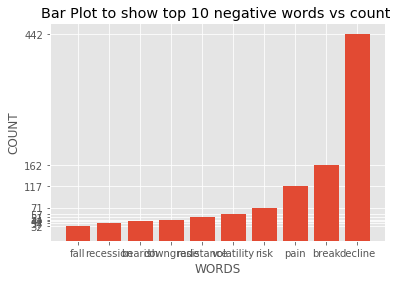

In [35]:
# Plotting the Bar Plot to show top 10 negative words vs count
y=my_list_names[-10:]
plt.bar(y, height=my_list_values[-10:])
plt.xticks(my_list_names[-10:],my_list_names[-10:])
plt.yticks(my_list_values[-10:])
plt.xlabel("WORDS")
plt.ylabel("COUNT")
plt.title("Bar Plot to show top 10 negative words vs count ")
plt.show()

In [36]:
for x in final_dataset_Tweets.Tweet_nonstop:
    for key in x:
        if key in pos_lines:
            if key in comb_word_tweet:
                comb_word_tweet[key] += x[key]
            else:
                comb_word_tweet[key] = x[key]

In [37]:
my_list_names = []
my_list_values = []

for key, value in sorted(comb_word_tweet.items(), key=lambda item: item[1]):
    my_list_names.append(key)
    my_list_values.append(value)
    count += 1

print(my_list_names[-10:], my_list_values[-10:])

['good', 'trust', 'best', 'pain', 'free', 'like', 'boost', 'break', 'top', 'decline'] [101, 106, 108, 117, 123, 128, 148, 162, 179, 442]


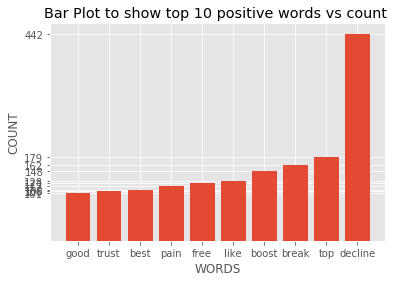

In [38]:
# Plotting the Bar Plot to show top 10 positive words vs count
y=my_list_names[-10:]
plt.bar(y, height=my_list_values[-10:])
plt.xticks(my_list_names[-10:],my_list_names[-10:])
plt.yticks(my_list_values[-10:])
plt.xlabel("WORDS")
plt.ylabel("COUNT")
plt.title("Bar Plot to show top 10 positive words vs count ")
plt.show()

### Sentiment Analysis

We created our own sentiment parity generator by creating 2 customized files named positive_words and negative words. This gave us the benefit of getting only positive and negative scores.

Thus, we were able to understand financial performance of each brands more closely as a product of ups and downs of stock prices with respect to scores.

In [39]:
#Sentiment Score Generator
final_dataset_Tweets['pos_parity_tweets']=final_dataset_Tweets['Tweet_nonstop'].apply(lambda x: pos_parity(x))

In [40]:
final_dataset_Tweets['neg_parity_tweets']=final_dataset_Tweets['Tweet_nonstop'].apply(lambda x: neg_parity(x))


In [41]:
final_dataset_Tweets

Month Day                                      Tweet_nonstop  \
0     03  16  {'active': 2, 'stock': 6, 'options': 4, 'frida...   
1     03  17  {'chase': 44, 'jpm': 80, 'branch': 2, 'st': 2,...   
2     03  18  {'profitpacked': 2, 'option': 4, 'trade': 34, ...   
3     03  19  {'profitpacked': 2, 'option': 4, 'trade': 28, ...   
4     03  20  {'profitpacked': 2, 'option': 2, 'trade': 24, ...   
5     03  21  {'profitpacked': 2, 'option': 6, 'trade': 38, ...   
6     03  22  {'profitpacked': 2, 'option': 4, 'trade': 42, ...   
7     03  23  {'profitpacked': 2, 'option': 4, 'trade': 22, ...   
8     03  24  {'profitpacked': 2, 'option': 2, 'trade': 20, ...   
9     03  25  {'profitpacked': 1, 'option': 4, 'trade': 22, ...   
10    03  26  {'kneesvillage': 1, 'farm': 1, 'international'...   
11    03  27  {'profitpacked': 1, 'option': 1, 'trade': 17, ...   
12    03  28  {'profitpacked': 1, 'option': 1, 'trade': 20, ...   
13    03  30  {'unpopular': 1, 'opinion': 1, 'buy': 2, 'bank...   
14    03  31  {'profitpacked': 1, 'option': 1, 'trade': 17, ...   
15    04  01  {'profitpacked': 1, 'option': 2, 'trade': 21, ...   
16    04  02  {'profitpacked': 1, 'option': 2, 'trade': 20, ...   
17    04  03  {'profitpacked': 1, 'option': 1, 'trade': 21, ...   
18    04  04  {'profitpacked': 1, 'option': 2, 'trade': 21, ...   
19    04  05  {'profitpacked': 1, 'option': 1, 'trade': 26, ...   
20    04  06  {'profitpacked': 1, 'option': 1, 'trade': 14, ...   
21    04  07  {'profitpacked': 1, 'option': 1, 'trade': 13, ...   
22    04  08  {'profitpacked': 1, 'option': 2, 'trade': 23, ...   
23    04  09  {'profitpacked': 1, 'option': 2, 'trade': 23, ...   
24    04  10  {'profitpacked': 1, 'option': 1, 'trade': 18, ...   
25    04  11  {'profitpacked': 1, 'option': 4, 'trade': 27, ...   
26    04  12  {'profitpacked': 1, 'option': 10, 'trade': 64,...   
27    04  13  {'profitpacked': 1, 'option': 3, 'trade': 13, ...   
28    04  14  {'profitpacked': 1, 'option': 1, 'trade': 16, ...   
29    04  15  {'profitpacked': 1, 'option': 6, 'trade': 25, ...   
30    04  16  {'profitpacked': 1, 'option': 2, 'trade': 20, ...   

    pos_parity_tweets  neg_parity_tweets  
0            0.024194           0.029570  
1            0.026399           0.026399  
2            0.024884           0.023818  
3            0.034634           0.018851  
4            0.026899           0.026899  
5            0.026760           0.032935  
6            0.022383           0.036501  
7            0.027473           0.018315  
8            0.015200           0.026400  
9            0.031883           0.027581  
10           0.023915           0.025028  
11           0.024025           0.031825  
12           0.025270           0.027541  
13           0.045822           0.026954  
14           0.018626           0.022701  
15           0.026369           0.023182  
16           0.021194           0.021791  
17           0.023810           0.019481  
18           0.025137           0.031474  
19           0.023451           0.024567  
20           0.021770           0.031601  
21           0.027607           0.023517  
22           0.027339           0.024658  
23           0.021378           0.024396  
24           0.025133           0.024671  
25           0.032105           0.021332  
26           0.041391           0.022721  
27           0.027604           0.015104  
28           0.024839           0.028979  
29           0.026025           0.021254  
30           0.022789           0.019599

In [42]:
new_df_Tweets = final_dataset_Tweets.drop(["Tweet_nonstop","Month","Day"], axis=1)
final_dataset_Tweets['Day'] = final_dataset_Tweets['Day'].astype(int)
final_dataset_Tweets['Month'] = final_dataset_Tweets['Month'].astype(int)
new_df_Tweets

pos_parity_tweets  neg_parity_tweets
0            0.024194           0.029570
1            0.026399           0.026399
2            0.024884           0.023818
3            0.034634           0.018851
4            0.026899           0.026899
5            0.026760           0.032935
6            0.022383           0.036501
7            0.027473           0.018315
8            0.015200           0.026400
9            0.031883           0.027581
10           0.023915           0.025028
11           0.024025           0.031825
12           0.025270           0.027541
13           0.045822           0.026954
14           0.018626           0.022701
15           0.026369           0.023182
16           0.021194           0.021791
17           0.023810           0.019481
18           0.025137           0.031474
19           0.023451           0.024567
20           0.021770           0.031601
21           0.027607           0.023517
22           0.027339           0.024658
23           0.021378           0.024396
24           0.025133           0.024671
25           0.032105           0.021332
26           0.041391           0.022721
27           0.027604           0.015104
28           0.024839           0.028979
29           0.026025           0.021254
30           0.022789           0.019599

In [43]:
#def mmdd_feature(x,y):
#    s=x+x/y
#    return float(s)

In [44]:
#Adding Date Feature that notifies each month and day discreetly
new_df_Tweets['date_feature']= (final_dataset_Tweets['Month']+final_dataset_Tweets['Day'])/final_dataset_Tweets['Month']

In [45]:
new_df_Tweets

pos_parity_tweets  neg_parity_tweets  date_feature
0            0.024194           0.029570      6.333333
1            0.026399           0.026399      6.666667
2            0.024884           0.023818      7.000000
3            0.034634           0.018851      7.333333
4            0.026899           0.026899      7.666667
5            0.026760           0.032935      8.000000
6            0.022383           0.036501      8.333333
7            0.027473           0.018315      8.666667
8            0.015200           0.026400      9.000000
9            0.031883           0.027581      9.333333
10           0.023915           0.025028      9.666667
11           0.024025           0.031825     10.000000
12           0.025270           0.027541     10.333333
13           0.045822           0.026954     11.000000
14           0.018626           0.022701     11.333333
15           0.026369           0.023182      1.250000
16           0.021194           0.021791      1.500000
17           0.023810           0.019481      1.750000
18           0.025137           0.031474      2.000000
19           0.023451           0.024567      2.250000
20           0.021770           0.031601      2.500000
21           0.027607           0.023517      2.750000
22           0.027339           0.024658      3.000000
23           0.021378           0.024396      3.250000
24           0.025133           0.024671      3.500000
25           0.032105           0.021332      3.750000
26           0.041391           0.022721      4.000000
27           0.027604           0.015104      4.250000
28           0.024839           0.028979      4.500000
29           0.026025           0.021254      4.750000
30           0.022789           0.019599      5.000000

### NEWS SENTIMENT ANALYSIS

In [46]:
#Loading News Data
df1 = pd.read_csv('JPM.csv',encoding='utf=8') #header=None, names=['Date_time', 'Tweets'])
#df['Date'] = df['Date_time']

In [47]:
df1.head()

Date                                                JPM
0  4/16/2019  us bancorp usb q1 earnings meet estimates reve...
1  4/16/2019  is jpmorgan stock the obvious choice among lar...
2  4/16/2019  financial sector update for 04172019 bk ms usb...
3  4/16/2019  wall street banks under pressure to make deepe...
4  4/16/2019  companies warn trump census citizenship questi...

In [48]:
# Following the same data cleaning process for the scrapped news data as done for the tweets

In [49]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [50]:
# Removing all punctuations
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', ' ', text)
    return text

df1['JPM_punct'] = df1['JPM'].apply(lambda x: remove_punct(x))
df1.head(10)

Date                                                JPM  \
0  4/16/2019  us bancorp usb q1 earnings meet estimates reve...   
1  4/16/2019  is jpmorgan stock the obvious choice among lar...   
2  4/16/2019  financial sector update for 04172019 bk ms usb...   
3  4/16/2019  wall street banks under pressure to make deepe...   
4  4/16/2019  companies warn trump census citizenship questi...   
5  4/16/2019  emergingmarket forex revenues eclipse g10 for ...   
6  4/16/2019           bank earnings and getting to know zelle    
7  4/16/2019                 mixed start to q1 earnings season    
8  4/16/2019         5 top stock trades for wednesday bac ms o    
9  4/16/2019            what will the q1 earnings season bring    

                                           JPM_punct  
0  us bancorp usb q  earnings meet estimates reve...  
1  is jpmorgan stock the obvious choice among lar...  
2  financial sector update for   bk ms usb jpm ba...  
3  wall street banks under pressure to make deepe...  
4  companies warn trump census citizenship questi...  
5  emergingmarket forex revenues eclipse g  for f...  
6           bank earnings and getting to know zelle   
7                 mixed start to q  earnings season   
8           top stock trades for wednesday bac ms o   
9            what will the q  earnings season bring

In [51]:
# removing newline or \n expressions.
df1["JPM_nonewline"] = [tweet.replace('\n'," ").strip() for tweet in df1["JPM_punct"]]
df1.head(20)

Date                                                JPM  \
0   4/16/2019  us bancorp usb q1 earnings meet estimates reve...   
1   4/16/2019  is jpmorgan stock the obvious choice among lar...   
2   4/16/2019  financial sector update for 04172019 bk ms usb...   
3   4/16/2019  wall street banks under pressure to make deepe...   
4   4/16/2019  companies warn trump census citizenship questi...   
5   4/16/2019  emergingmarket forex revenues eclipse g10 for ...   
6   4/16/2019           bank earnings and getting to know zelle    
7   4/16/2019                 mixed start to q1 earnings season    
8   4/16/2019         5 top stock trades for wednesday bac ms o    
9   4/16/2019            what will the q1 earnings season bring    
10  4/16/2019         interesting jpm put options for may 31st1    
11  4/16/2019  bofa bac q1 earnings beat on loan growth highe...   
12  4/16/2019  the zacks analyst blog highlights jpmorgan vis...   
13  4/16/2019  financial sector update for 04162019 blk bac c...   
14  4/16/2019  pathfinder bancorp inc pbhc ex dividend date s...   
15  4/16/2019  bridge bancorp inc bdge ex dividend date sched...   
16  4/16/2019  european shares at 8month high boosted by fina...   
17  4/16/2019  comerica cma q1 earnings beat estimates revenu...   
18  4/16/2019  wall st rises on tech boost robust johnson  jo...   
19  4/16/2019  us stockswall st rises on tech boost robust jo...   

                                            JPM_punct  \
0   us bancorp usb q  earnings meet estimates reve...   
1   is jpmorgan stock the obvious choice among lar...   
2   financial sector update for   bk ms usb jpm ba...   
3   wall street banks under pressure to make deepe...   
4   companies warn trump census citizenship questi...   
5   emergingmarket forex revenues eclipse g  for f...   
6            bank earnings and getting to know zelle    
7                  mixed start to q  earnings season    
8            top stock trades for wednesday bac ms o    
9             what will the q  earnings season bring    
10          interesting jpm put options for may  st     
11  bofa bac q  earnings beat on loan growth highe...   
12  the zacks analyst blog highlights jpmorgan vis...   
13  financial sector update for   blk bac cma jpm ...   
14  pathfinder bancorp inc pbhc ex dividend date s...   
15  bridge bancorp inc bdge ex dividend date sched...   
16  european shares at  month high boosted by fina...   
17  comerica cma q  earnings beat estimates revenu...   
18  wall st rises on tech boost robust johnson  jo...   
19  us stockswall st rises on tech boost robust jo...   

                                        JPM_nonewline  
0   us bancorp usb q  earnings meet estimates reve...  
1   is jpmorgan stock the obvious choice among lar...  
2   financial sector update for   bk ms usb jpm ba...  
3   wall street banks under pressure to make deepe...  
4   companies warn trump census citizenship questi...  
5   emergingmarket forex revenues eclipse g  for f...  
6             bank earnings and getting to know zelle  
7                   mixed start to q  earnings season  
8             top stock trades for wednesday bac ms o  
9              what will the q  earnings season bring  
10            interesting jpm put options for may  st  
11  bofa bac q  earnings beat on loan growth highe...  
12  the zacks analyst blog highlights jpmorgan vis...  
13  financial sector update for   blk bac cma jpm ...  
14  pathfinder bancorp inc pbhc ex dividend date s...  
15  bridge bancorp inc bdge ex dividend date sched...  
16  european shares at  month high boosted by fina...  
17  comerica cma q  earnings beat estimates revenu...  
18  wall st rises on tech boost robust johnson  jo...  
19  us stockswall st rises on tech boost robust jo...

In [52]:
#Removing http url from every tweet substitued with space
df1["JPM_wohttp"] = [re.sub(r"http\S+", " ", text) for text in df1["JPM_nonewline"]]
df1.head()

Date                                                JPM  \
0  4/16/2019  us bancorp usb q1 earnings meet estimates reve...   
1  4/16/2019  is jpmorgan stock the obvious choice among lar...   
2  4/16/2019  financial sector update for 04172019 bk ms usb...   
3  4/16/2019  wall street banks under pressure to make deepe...   
4  4/16/2019  companies warn trump census citizenship questi...   

                                           JPM_punct  \
0  us bancorp usb q  earnings meet estimates reve...   
1  is jpmorgan stock the obvious choice among lar...   
2  financial sector update for   bk ms usb jpm ba...   
3  wall street banks under pressure to make deepe...   
4  companies warn trump census citizenship questi...   

                                       JPM_nonewline  \
0  us bancorp usb q  earnings meet estimates reve...   
1  is jpmorgan stock the obvious choice among lar...   
2  financial sector update for   bk ms usb jpm ba...   
3  wall street banks under pressure to make deepe...   
4  companies warn trump census citizenship questi...   

                                          JPM_wohttp  
0  us bancorp usb q  earnings meet estimates reve...  
1  is jpmorgan stock the obvious choice among lar...  
2  financial sector update for   bk ms usb jpm ba...  
3  wall street banks under pressure to make deepe...  
4  companies warn trump census citizenship questi...

In [53]:
# Removing numbers
df1["JPM_nonum"] = [re.sub("\d+", " ", text) for text in df1["JPM_wohttp"]]
df1.head(20)

Date                                                JPM  \
0   4/16/2019  us bancorp usb q1 earnings meet estimates reve...   
1   4/16/2019  is jpmorgan stock the obvious choice among lar...   
2   4/16/2019  financial sector update for 04172019 bk ms usb...   
3   4/16/2019  wall street banks under pressure to make deepe...   
4   4/16/2019  companies warn trump census citizenship questi...   
5   4/16/2019  emergingmarket forex revenues eclipse g10 for ...   
6   4/16/2019           bank earnings and getting to know zelle    
7   4/16/2019                 mixed start to q1 earnings season    
8   4/16/2019         5 top stock trades for wednesday bac ms o    
9   4/16/2019            what will the q1 earnings season bring    
10  4/16/2019         interesting jpm put options for may 31st1    
11  4/16/2019  bofa bac q1 earnings beat on loan growth highe...   
12  4/16/2019  the zacks analyst blog highlights jpmorgan vis...   
13  4/16/2019  financial sector update for 04162019 blk bac c...   
14  4/16/2019  pathfinder bancorp inc pbhc ex dividend date s...   
15  4/16/2019  bridge bancorp inc bdge ex dividend date sched...   
16  4/16/2019  european shares at 8month high boosted by fina...   
17  4/16/2019  comerica cma q1 earnings beat estimates revenu...   
18  4/16/2019  wall st rises on tech boost robust johnson  jo...   
19  4/16/2019  us stockswall st rises on tech boost robust jo...   

                                            JPM_punct  \
0   us bancorp usb q  earnings meet estimates reve...   
1   is jpmorgan stock the obvious choice among lar...   
2   financial sector update for   bk ms usb jpm ba...   
3   wall street banks under pressure to make deepe...   
4   companies warn trump census citizenship questi...   
5   emergingmarket forex revenues eclipse g  for f...   
6            bank earnings and getting to know zelle    
7                  mixed start to q  earnings season    
8            top stock trades for wednesday bac ms o    
9             what will the q  earnings season bring    
10          interesting jpm put options for may  st     
11  bofa bac q  earnings beat on loan growth highe...   
12  the zacks analyst blog highlights jpmorgan vis...   
13  financial sector update for   blk bac cma jpm ...   
14  pathfinder bancorp inc pbhc ex dividend date s...   
15  bridge bancorp inc bdge ex dividend date sched...   
16  european shares at  month high boosted by fina...   
17  comerica cma q  earnings beat estimates revenu...   
18  wall st rises on tech boost robust johnson  jo...   
19  us stockswall st rises on tech boost robust jo...   

                                        JPM_nonewline  \
0   us bancorp usb q  earnings meet estimates reve...   
1   is jpmorgan stock the obvious choice among lar...   
2   financial sector update for   bk ms usb jpm ba...   
3   wall street banks under pressure to make deepe...   
4   companies warn trump census citizenship questi...   
5   emergingmarket forex revenues eclipse g  for f...   
6             bank earnings and getting to know zelle   
7                   mixed start to q  earnings season   
8             top stock trades for wednesday bac ms o   
9              what will the q  earnings season bring   
10            interesting jpm put options for may  st   
11  bofa bac q  earnings beat on loan growth highe...   
12  the zacks analyst blog highlights jpmorgan vis...   
13  financial sector update for   blk bac cma jpm ...   
14  pathfinder bancorp inc pbhc ex dividend date s...   
15  bridge bancorp inc bdge ex dividend date sched...   
16  european shares at  month high boosted by fina...   
17  comerica cma q  earnings beat estimates revenu...   
18  wall st rises on tech boost robust johnson  jo...   
19  us stockswall st rises on tech boost robust jo...   

                                           JPM_wohttp  \
0   us bancorp usb q  earnings meet estimates reve...   
1   is jpmorgan stock the obvious choice among lar...   
2   financial

In [54]:
#Removing ASCII Values
df1["JPM_noascii"] = [re.sub(r'[^\x00-\x7F]+',' ', text) for text in df1["JPM_nonum"]]
df1.head()

Date                                                JPM  \
0  4/16/2019  us bancorp usb q1 earnings meet estimates reve...   
1  4/16/2019  is jpmorgan stock the obvious choice among lar...   
2  4/16/2019  financial sector update for 04172019 bk ms usb...   
3  4/16/2019  wall street banks under pressure to make deepe...   
4  4/16/2019  companies warn trump census citizenship questi...   

                                           JPM_punct  \
0  us bancorp usb q  earnings meet estimates reve...   
1  is jpmorgan stock the obvious choice among lar...   
2  financial sector update for   bk ms usb jpm ba...   
3  wall street banks under pressure to make deepe...   
4  companies warn trump census citizenship questi...   

                                       JPM_nonewline  \
0  us bancorp usb q  earnings meet estimates reve...   
1  is jpmorgan stock the obvious choice among lar...   
2  financial sector update for   bk ms usb jpm ba...   
3  wall street banks under pressure to make deepe...   
4  companies warn trump census citizenship questi...   

                                          JPM_wohttp  \
0  us bancorp usb q  earnings meet estimates reve...   
1  is jpmorgan stock the obvious choice among lar...   
2  financial sector update for   bk ms usb jpm ba...   
3  wall street banks under pressure to make deepe...   
4  companies warn trump census citizenship questi...   

                                           JPM_nonum  \
0  us bancorp usb q  earnings meet estimates reve...   
1  is jpmorgan stock the obvious choice among lar...   
2  financial sector update for   bk ms usb jpm ba...   
3  wall street banks under pressure to make deepe...   
4  companies warn trump census citizenship questi...   

                                         JPM_noascii  
0  us bancorp usb q  earnings meet estimates reve...  
1  is jpmorgan stock the obvious choice among lar...  
2  financial sector update for   bk ms usb jpm ba...  
3  wall street banks under pressure to make deepe...  
4  companies warn trump census citizenship questi...

In [55]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

df1['JPM_tokenized'] = df1['JPM_noascii'].apply(lambda x: tokenization(x.lower()))
df1.head()

Date                                                JPM  \
0  4/16/2019  us bancorp usb q1 earnings meet estimates reve...   
1  4/16/2019  is jpmorgan stock the obvious choice among lar...   
2  4/16/2019  financial sector update for 04172019 bk ms usb...   
3  4/16/2019  wall street banks under pressure to make deepe...   
4  4/16/2019  companies warn trump census citizenship questi...   

                                           JPM_punct  \
0  us bancorp usb q  earnings meet estimates reve...   
1  is jpmorgan stock the obvious choice among lar...   
2  financial sector update for   bk ms usb jpm ba...   
3  wall street banks under pressure to make deepe...   
4  companies warn trump census citizenship questi...   

                                       JPM_nonewline  \
0  us bancorp usb q  earnings meet estimates reve...   
1  is jpmorgan stock the obvious choice among lar...   
2  financial sector update for   bk ms usb jpm ba...   
3  wall street banks under pressure to make deepe...   
4  companies warn trump census citizenship questi...   

                                          JPM_wohttp  \
0  us bancorp usb q  earnings meet estimates reve...   
1  is jpmorgan stock the obvious choice among lar...   
2  financial sector update for   bk ms usb jpm ba...   
3  wall street banks under pressure to make deepe...   
4  companies warn trump census citizenship questi...   

                                           JPM_nonum  \
0  us bancorp usb q  earnings meet estimates reve...   
1  is jpmorgan stock the obvious choice among lar...   
2  financial sector update for   bk ms usb jpm ba...   
3  wall street banks under pressure to make deepe...   
4  companies warn trump census citizenship questi...   

                                         JPM_noascii  \
0  us bancorp usb q  earnings meet estimates reve...   
1  is jpmorgan stock the obvious choice among lar...   
2  financial sector update for   bk ms usb jpm ba...   
3  wall street banks under pressure to make deepe...   
4  companies warn trump census citizenship questi...   

                                       JPM_tokenized  
0  [us, bancorp, usb, q, earnings, meet, estimate...  
1  [is, jpmorgan, stock, the, obvious, choice, am...  
2  [financial, sector, update, for, bk, ms, usb, ...  
3  [wall, street, banks, under, pressure, to, mak...  
4  [companies, warn, trump, census, citizenship, ...

In [56]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word, pos="v") for word in text]
    return text

df1['JPM_lemmatized'] = df1['JPM_tokenized'].apply(lambda x: lemmatizer(x))
df1.head()

Date                                                JPM  \
0  4/16/2019  us bancorp usb q1 earnings meet estimates reve...   
1  4/16/2019  is jpmorgan stock the obvious choice among lar...   
2  4/16/2019  financial sector update for 04172019 bk ms usb...   
3  4/16/2019  wall street banks under pressure to make deepe...   
4  4/16/2019  companies warn trump census citizenship questi...   

                                           JPM_punct  \
0  us bancorp usb q  earnings meet estimates reve...   
1  is jpmorgan stock the obvious choice among lar...   
2  financial sector update for   bk ms usb jpm ba...   
3  wall street banks under pressure to make deepe...   
4  companies warn trump census citizenship questi...   

                                       JPM_nonewline  \
0  us bancorp usb q  earnings meet estimates reve...   
1  is jpmorgan stock the obvious choice among lar...   
2  financial sector update for   bk ms usb jpm ba...   
3  wall street banks under pressure to make deepe...   
4  companies warn trump census citizenship questi...   

                                          JPM_wohttp  \
0  us bancorp usb q  earnings meet estimates reve...   
1  is jpmorgan stock the obvious choice among lar...   
2  financial sector update for   bk ms usb jpm ba...   
3  wall street banks under pressure to make deepe...   
4  companies warn trump census citizenship questi...   

                                           JPM_nonum  \
0  us bancorp usb q  earnings meet estimates reve...   
1  is jpmorgan stock the obvious choice among lar...   
2  financial sector update for   bk ms usb jpm ba...   
3  wall street banks under pressure to make deepe...   
4  companies warn trump census citizenship questi...   

                                         JPM_noascii  \
0  us bancorp usb q  earnings meet estimates reve...   
1  is jpmorgan stock the obvious choice among lar...   
2  financial sector update for   bk ms usb jpm ba...   
3  wall street banks under pressure to make deepe...   
4  companies warn trump census citizenship questi...   

                                       JPM_tokenized  \
0  [us, bancorp, usb, q, earnings, meet, estimate...   
1  [is, jpmorgan, stock, the, obvious, choice, am...   
2  [financial, sector, update, for, bk, ms, usb, ...   
3  [wall, street, banks, under, pressure, to, mak...   
4  [companies, warn, trump, census, citizenship, ...   

                                      JPM_lemmatized  
0  [us, bancorp, usb, q, earn, meet, estimate, re...  
1  [be, jpmorgan, stock, the, obvious, choice, am...  
2  [financial, sector, update, for, bk, ms, usb, ...  
3  [wall, street, bank, under, pressure, to, make...  
4  [company, warn, trump, census, citizenship, qu...

In [57]:
stopword = nltk.corpus.stopwords.words('english')

In [58]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df1['JPM_nonstop'] = df1['JPM_lemmatized'].apply(lambda x: remove_stopwords(x))
df1.head()

Date                                                JPM  \
0  4/16/2019  us bancorp usb q1 earnings meet estimates reve...   
1  4/16/2019  is jpmorgan stock the obvious choice among lar...   
2  4/16/2019  financial sector update for 04172019 bk ms usb...   
3  4/16/2019  wall street banks under pressure to make deepe...   
4  4/16/2019  companies warn trump census citizenship questi...   

                                           JPM_punct  \
0  us bancorp usb q  earnings meet estimates reve...   
1  is jpmorgan stock the obvious choice among lar...   
2  financial sector update for   bk ms usb jpm ba...   
3  wall street banks under pressure to make deepe...   
4  companies warn trump census citizenship questi...   

                                       JPM_nonewline  \
0  us bancorp usb q  earnings meet estimates reve...   
1  is jpmorgan stock the obvious choice among lar...   
2  financial sector update for   bk ms usb jpm ba...   
3  wall street banks under pressure to make deepe...   
4  companies warn trump census citizenship questi...   

                                          JPM_wohttp  \
0  us bancorp usb q  earnings meet estimates reve...   
1  is jpmorgan stock the obvious choice among lar...   
2  financial sector update for   bk ms usb jpm ba...   
3  wall street banks under pressure to make deepe...   
4  companies warn trump census citizenship questi...   

                                           JPM_nonum  \
0  us bancorp usb q  earnings meet estimates reve...   
1  is jpmorgan stock the obvious choice among lar...   
2  financial sector update for   bk ms usb jpm ba...   
3  wall street banks under pressure to make deepe...   
4  companies warn trump census citizenship questi...   

                                         JPM_noascii  \
0  us bancorp usb q  earnings meet estimates reve...   
1  is jpmorgan stock the obvious choice among lar...   
2  financial sector update for   bk ms usb jpm ba...   
3  wall street banks under pressure to make deepe...   
4  companies warn trump census citizenship questi...   

                                       JPM_tokenized  \
0  [us, bancorp, usb, q, earnings, meet, estimate...   
1  [is, jpmorgan, stock, the, obvious, choice, am...   
2  [financial, sector, update, for, bk, ms, usb, ...   
3  [wall, street, banks, under, pressure, to, mak...   
4  [companies, warn, trump, census, citizenship, ...   

                                      JPM_lemmatized  \
0  [us, bancorp, usb, q, earn, meet, estimate, re...   
1  [be, jpmorgan, stock, the, obvious, choice, am...   
2  [financial, sector, update, for, bk, ms, usb, ...   
3  [wall, street, bank, under, pressure, to, make...   
4  [company, warn, trump, census, citizenship, qu...   

                                         JPM_nonstop  
0  [us, bancorp, usb, q, earn, meet, estimate, re...  
1  [jpmorgan, stock, obvious, choice, among, larg...  
2  [financial, sector, update, bk, ms, usb, jpm, ...  
3  [wall, street, bank, pressure, make, deeper, c...  
4  [company, warn, trump, census, citizenship, qu...

In [59]:
JPM_Data_News = df1.drop(["JPM","JPM_punct","JPM_nonewline","JPM_wohttp","JPM_nonum","JPM_noascii","JPM_tokenized","JPM_lemmatized"], axis=1)

In [60]:
JPM_Data_News.head()
print(type(JPM_Data_News.Date))

<class 'pandas.core.series.Series'>


In [61]:
JPM_Data_News['Month']=[d.split('/')[0] for d in JPM_Data_News.Date]
JPM_Data_News['Day']=[d.split('/')[1] for d in JPM_Data_News.Date]
JPM_Data_News['Year']=[d.split('/')[2] for d in JPM_Data_News.Date]

In [62]:
JPM_Data_News.head()

Date                                        JPM_nonstop Month Day  \
0  4/16/2019  [us, bancorp, usb, q, earn, meet, estimate, re...     4  16   
1  4/16/2019  [jpmorgan, stock, obvious, choice, among, larg...     4  16   
2  4/16/2019  [financial, sector, update, bk, ms, usb, jpm, ...     4  16   
3  4/16/2019  [wall, street, bank, pressure, make, deeper, c...     4  16   
4  4/16/2019  [company, warn, trump, census, citizenship, qu...     4  16   

   Year  
0  2019  
1  2019  
2  2019  
3  2019  
4  2019

In [63]:
JPM_Data_News = JPM_Data_News.drop(['Date','Year'],axis=1)


In [64]:
JPM_Data_News.head(50)

JPM_nonstop Month Day
0   [us, bancorp, usb, q, earn, meet, estimate, re...     4  16
1   [jpmorgan, stock, obvious, choice, among, larg...     4  16
2   [financial, sector, update, bk, ms, usb, jpm, ...     4  16
3   [wall, street, bank, pressure, make, deeper, c...     4  16
4   [company, warn, trump, census, citizenship, qu...     4  16
5   [emergingmarket, forex, revenues, eclipse, g, ...     4  16
6                      [bank, earn, get, know, zelle]     4  16
7                       [mix, start, q, earn, season]     4  16
8             [top, stock, trade, wednesday, bac, ms]     4  16
9                            [q, earn, season, bring]     4  16
10             [interest, jpm, put, options, may, st]     4  16
11  [bofa, bac, q, earn, beat, loan, growth, highe...     4  16
12  [zacks, analyst, blog, highlight, jpmorgan, vi...     4  16
13  [financial, sector, update, blk, bac, cma, jpm...     4  16
14  [pathfinder, bancorp, inc, pbhc, ex, dividend,...     4  16
15  [bridge, bancorp, inc, bdge, ex, dividend, dat...     4  16
16  [european, share, month, high, boost, financia...     4  16
17  [comerica, cma, q, earn, beat, estimate, reven...     4  16
18  [wall, st, rise, tech, boost, robust, johnson,...     4  16
19  [us, stockswall, st, rise, tech, boost, robust...     4  16
20  [us, stockswall, st, set, open, higher, robust...     4  16
21  [wall, st, set, open, higher, robust, healthca...     4  16
22  [us, stocksfutures, rise, boost, upbeat, healt...     4  16
23  [futures, rise, boost, upbeat, healthcare, ban...     4  16
24  [bank, america, warn, slow, growth, net, inter...     4  16
25  [bank, america, revenue, miss, forecast, share...     4  16
26  [bank, america, quarterly, revenue, slip, earn...     4  16
27  [bank, americas, firstquarter, revenues, miss,...     4  16
28  [bank, america, profit, top, estimate, grow, l...     4  16
29  [bank, america, profit, rise, pct, grow, loan,...     4  16
30         [goldman, sachs, supertanker, start, turn]     4  16
31     [uaes, finablr, list, london, stock, exchange]     4  16
32  [us, house, panel, issue, subpoena, deutsche, ...     4  15
33  [top, stock, trade, tuesday, c, apha, czr, goo...     4  15
34                          [top, stock, pick, april]     4  15
35  [forget, rate, woes, bank, etfs, stay, strong,...     4  15
36  [bank, america, likely, beat, earn, expectations]     4  15
37  [new, york, minute, citi, goldman, mix, q, emp...     4  15
38                                [q, earn, continue]     4  15
39      [top, stock, report, jpmorgan, visa, chevron]     4  15
40             [interest, jpm, put, options, may, st]     4  15
41  [jpmorgan, well, fargo, citigroup, bank, ameri...     4  15
42                             [dow, movers, gs, unh]     4  15
43  [new, york, minute, citi, goldman, mix, q, emp...     4  15
44                         [stock, market, news, apr]     4  15
45         [market, likely, northward, journey, pick]     4  15
46  [weekly, market, summary, rid, wave, momentum,...     4  15
47  [mondays, vital, data, disney, netflix, well, ...     4  15
48  [citigroup, c, q, earn, beat, estimate, revenu...     4  15
49         [big, bank, earn, impress, q, great, pick]     4  15

In [65]:
final_dataset_News = pd.DataFrame(data=None, index=None,columns=['Month','Day','JPM_nonstop'])

In [66]:
final_dataset_News = JPM_Data_News.groupby(['Month','Day'])['JPM_nonstop'].apply(list).reset_index()

In [67]:
final_dataset_News

Month Day                                        JPM_nonstop
0      3  16  [[first, earn, decline, three, years], [first,...
1      3  17  [[noteworthy, friday, option, activity, rjf, j...
2      3  18  [[dianrong, boss, daringly, say, many, think],...
3      3  19  [[scrap, foreign, ownership, cap, chinalisted,...
4      3  20  [[weak, earn, growth, ahead], [weak, earn, gro...
5      3  21  [[nasdaq, composite, index, close, point, week...
6      3  22  [[us, stock, movetesla, ge, nike, southwest, a...
7      3  23  [[top, value, stock, buy, march], [validea, ja...
8      3  24  [[fifth, third, expand, digital, capabilities,...
9      3  25  [[forget, apples, credit, card, buy, fintech, ...
10     3  26  [[jpmorgan, chase, jpm, outpace, stock, market...
11     3  27  [[margin, pressure, weigh, earn, growth], [fee...
12     3  28  [[jpmorgan, trim, wealth, job, periodic, revie...
13     3  29  [[chinese, ev, car, maker, nio, restrict, ipo,...
14     3  30  [[financial, sector, update, bgcp, jpm, bac, w...
15     3  31  [[nios, financial, road, rage, accomplish, lit...
16     4   1  [[notable, monday, option, activity, nuan, jpm...
17     4  10  [[buy, bank, america, stock, good, citizenship...
18     4  11  [[stock, close, mix, corporate, earn, ahead], ...
19     4  12  [[despite, feds, dovish, verbiage, bank, stock...
20     4  13  [[jpmorgan, chase, jpm, q, earn, call, transcr...
21     4  14  [[yen, near, years, low, franc, soft, rise, ri...
22     4  15  [[us, house, panel, issue, subpoena, deutsche,...
23     4  16  [[us, bancorp, usb, q, earn, meet, estimate, r...
24     4   2  [[tech, stock, buy, long, term, earn, growth],...
25     4   3  [[jpmorgan, chase, jpm, gain, lag, market, kno...
26     4   4  [[financial, sector, update, san, nmr, bac, jp...
27     4   5  [[jpmorgan, lead, blockchain, hire, job, open,...
28     4   6  [[preview, bank, earn], [earn, report, watch, ...
29     4   7  [[asia, share, month, peak, mood, turn, cautio...
30     4   8  [[close, update, nasdaq, sp, turn, positive, l...
31     4   9  [[big, bank, best, earn, chart], [insiders, lo...

In [68]:
#### APPLIED LIST TO DICT USING THE FUNCTION ABOVE

In [69]:
final_dataset_News['JPM_nonstop']=final_dataset_News['JPM_nonstop'].apply(lambda x: ltod(x))

In [70]:
final_dataset_News

Month Day                                        JPM_nonstop
0      3  16  {'first': 2, 'earn': 2, 'decline': 2, 'three':...
1      3  17  {'noteworthy': 1, 'friday': 1, 'option': 1, 'a...
2      3  18  {'dianrong': 1, 'boss': 1, 'daringly': 1, 'say...
3      3  19  {'scrap': 2, 'foreign': 2, 'ownership': 2, 'ca...
4      3  20  {'weak': 2, 'earn': 2, 'growth': 2, 'ahead': 2...
5      3  21  {'nasdaq': 1, 'composite': 1, 'index': 1, 'clo...
6      3  22  {'us': 4, 'stock': 3, 'movetesla': 1, 'ge': 1,...
7      3  23  {'top': 1, 'value': 1, 'stock': 1, 'buy': 1, '...
8      3  24  {'fifth': 1, 'third': 1, 'expand': 1, 'digital...
9      3  25  {'forget': 1, 'apples': 1, 'credit': 1, 'card'...
10     3  26  {'jpmorgan': 2, 'chase': 1, 'jpm': 2, 'outpace...
11     3  27  {'margin': 1, 'pressure': 2, 'weigh': 1, 'earn...
12     3  28  {'jpmorgan': 1, 'trim': 1, 'wealth': 1, 'job':...
13     3  29  {'chinese': 1, 'ev': 1, 'car': 1, 'maker': 1, ...
14     3  30  {'financial': 1, 'sector': 1, 'update': 1, 'bg...
15     3  31  {'nios': 1, 'financial': 3, 'road': 1, 'rage':...
16     4   1  {'notable': 1, 'monday': 1, 'option': 1, 'acti...
17     4  10  {'buy': 2, 'bank': 6, 'america': 2, 'stock': 3...
18     4  11  {'stock': 2, 'close': 2, 'mix': 1, 'corporate'...
19     4  12  {'despite': 1, 'feds': 1, 'dovish': 1, 'verbia...
20     4  13  {'jpmorgan': 1, 'chase': 1, 'jpm': 1, 'q': 1, ...
21     4  14  {'yen': 3, 'near': 5, 'years': 4, 'low': 4, 'f...
22     4  15  {'us': 8, 'house': 1, 'panel': 1, 'issue': 1, ...
23     4  16  {'us': 4, 'bancorp': 3, 'usb': 3, 'q': 5, 'ear...
24     4   2  {'tech': 1, 'stock': 3, 'buy': 1, 'long': 1, '...
25     4   3  {'jpmorgan': 1, 'chase': 2, 'jpm': 3, 'gain': ...
26     4   4  {'financial': 2, 'sector': 1, 'update': 1, 'sa...
27     4   5  {'jpmorgan': 2, 'lead': 1, 'blockchain': 1, 'h...
28     4   6  {'preview': 2, 'bank': 1, 'earn': 4, 'report':...
29     4   7  {'asia': 3, 'share': 3, 'month': 1, 'peak': 2,...
30     4   8  {'close': 1, 'update': 4, 'nasdaq': 3, 'sp': 2...
31     4   9  {'big': 1, 'bank': 5, 'best': 1, 'earn': 2, 'c...

In [71]:
comb_word_news={}
len(final_dataset_News.JPM_nonstop)

32

In [72]:
#Performing Data Analysis on the Text to get information about the top 10 most used positive and negative words for news
for x in final_dataset_News.JPM_nonstop:
    for key in x:
        if key in neg_lines:
            if key in comb_word_news:
                comb_word_news[key] += x[key]
            else:
                comb_word_news[key] = x[key]

In [73]:
my_list_names = []
my_list_values = []
count = 0
for key, value in sorted(comb_word_news.items(), key=lambda item: item[1]):
    my_list_names.append(key)
    my_list_values.append(value)
    count += 1

print(my_list_names[-10:], my_list_values[-10:])


['disappoint', 'decline', 'weak', 'mar', 'hurt', 'recession', 'fear', 'concern', 'risk', 'fall'] [3, 4, 4, 4, 4, 4, 4, 5, 5, 6]


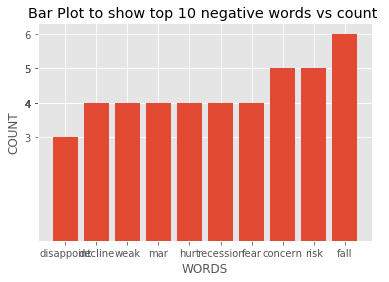

In [74]:
# Plotting the Bar Plot to show top 10 negative words vs count 
y=my_list_names[-10:]
plt.bar(y, height=my_list_values[-10:])
plt.xticks(my_list_names[-10:],my_list_names[-10:])
plt.yticks(my_list_values[-10:])
plt.xlabel("WORDS")
plt.ylabel("COUNT")
plt.title("Bar Plot to show top 10 negative words vs count ")
plt.show()

In [75]:
comb_word_news={}

In [76]:
for x in final_dataset_News.JPM_nonstop:
    for key in x:
        if key in pos_lines:
            if key in comb_word_news:
                comb_word_news[key] += x[key]
            else:
                comb_word_news[key] = x[key]

In [77]:
my_list_names = []
my_list_values = []
count = 0
for key, value in sorted(comb_word_news.items(), key=lambda item: item[1]):
    my_list_names.append(key)
    my_list_values.append(value)
    count += 1

print(my_list_names[-10:], my_list_values[-10:])

['solid', 'upbeat', 'robust', 'strong', 'optimism', 'best', 'gain', 'boost', 'top', 'well'] [4, 4, 4, 6, 7, 9, 13, 14, 19, 20]


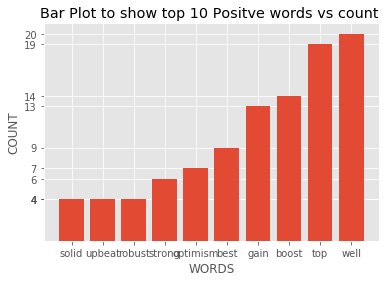

In [78]:
# Plotting the Bar Plot to show top 10 positive words vs count 
y=my_list_names[-10:]
plt.bar(y, height=my_list_values[-10:])
plt.xticks(my_list_names[-10:],my_list_names[-10:])
plt.yticks(my_list_values[-10:])
plt.xlabel("WORDS")
plt.ylabel("COUNT")
plt.title("Bar Plot to show top 10 Positve words vs count ")
plt.show()

In [79]:
#### USING POSITIVE LIST AND NEGATIVE LIST 

In [80]:
final_dataset_News['pos_parity_news']=final_dataset_News['JPM_nonstop'].apply(lambda x: pos_parity(x))

In [81]:
final_dataset_News['neg_parity_news']=final_dataset_News['JPM_nonstop'].apply(lambda x: neg_parity(x))

In [82]:
final_dataset_News

Month Day                                        JPM_nonstop  \
0      3  16  {'first': 2, 'earn': 2, 'decline': 2, 'three':...   
1      3  17  {'noteworthy': 1, 'friday': 1, 'option': 1, 'a...   
2      3  18  {'dianrong': 1, 'boss': 1, 'daringly': 1, 'say...   
3      3  19  {'scrap': 2, 'foreign': 2, 'ownership': 2, 'ca...   
4      3  20  {'weak': 2, 'earn': 2, 'growth': 2, 'ahead': 2...   
5      3  21  {'nasdaq': 1, 'composite': 1, 'index': 1, 'clo...   
6      3  22  {'us': 4, 'stock': 3, 'movetesla': 1, 'ge': 1,...   
7      3  23  {'top': 1, 'value': 1, 'stock': 1, 'buy': 1, '...   
8      3  24  {'fifth': 1, 'third': 1, 'expand': 1, 'digital...   
9      3  25  {'forget': 1, 'apples': 1, 'credit': 1, 'card'...   
10     3  26  {'jpmorgan': 2, 'chase': 1, 'jpm': 2, 'outpace...   
11     3  27  {'margin': 1, 'pressure': 2, 'weigh': 1, 'earn...   
12     3  28  {'jpmorgan': 1, 'trim': 1, 'wealth': 1, 'job':...   
13     3  29  {'chinese': 1, 'ev': 1, 'car': 1, 'maker': 1, ...   
14     3  30  {'financial': 1, 'sector': 1, 'update': 1, 'bg...   
15     3  31  {'nios': 1, 'financial': 3, 'road': 1, 'rage':...   
16     4   1  {'notable': 1, 'monday': 1, 'option': 1, 'acti...   
17     4  10  {'buy': 2, 'bank': 6, 'america': 2, 'stock': 3...   
18     4  11  {'stock': 2, 'close': 2, 'mix': 1, 'corporate'...   
19     4  12  {'despite': 1, 'feds': 1, 'dovish': 1, 'verbia...   
20     4  13  {'jpmorgan': 1, 'chase': 1, 'jpm': 1, 'q': 1, ...   
21     4  14  {'yen': 3, 'near': 5, 'years': 4, 'low': 4, 'f...   
22     4  15  {'us': 8, 'house': 1, 'panel': 1, 'issue': 1, ...   
23     4  16  {'us': 4, 'bancorp': 3, 'usb': 3, 'q': 5, 'ear...   
24     4   2  {'tech': 1, 'stock': 3, 'buy': 1, 'long': 1, '...   
25     4   3  {'jpmorgan': 1, 'chase': 2, 'jpm': 3, 'gain': ...   
26     4   4  {'financial': 2, 'sector': 1, 'update': 1, 'sa...   
27     4   5  {'jpmorgan': 2, 'lead': 1, 'blockchain': 1, 'h...   
28     4   6  {'preview': 2, 'bank': 1, 'earn': 4, 'report':...   
29     4   7  {'asia': 3, 'share': 3, 'month': 1, 'peak': 2,...   
30     4   8  {'close': 1, 'update': 4, 'nasdaq': 3, 'sp': 2...   
31     4   9  {'big': 1, 'bank': 5, 'best': 1, 'earn': 2, 'c...   

    pos_parity_news  neg_parity_news  
0          0.076923         0.076923  
1          0.053333         0.000000  
2          0.047619         0.000000  
3          0.016807         0.016807  
4          0.057143         0.028571  
5          0.036364         0.027273  
6          0.041667         0.055556  
7          0.076923         0.076923  
8          0.015152         0.060606  
9          0.032787         0.016393  
10         0.052632         0.000000  
11         0.005882         0.017647  
12         0.011765         0.023529  
13         0.075949         0.037975  
14         0.056075         0.000000  
15         0.056604         0.150943  
16         0.046296         0.000000  
17         0.035714         0.029762  
18         0.004975         0.029851  
19         0.081784         0.033457  
20         0.000000         0.000000  
21         0.131148         0.065574  
22         0.062323         0.036827  
23         0.061475         0.024590  
24         0.016129         0.048387  
25         0.033333         0.066667  
26         0.025000         0.025000  
27         0.039216         0.019608  
28         0.000000         0.022222  
29         0.029412         0.000000  
30         0.025806         0.000000  
31         0.035354         0.055556

In [83]:
new_df_News= final_dataset_News.drop(["JPM_nonstop","Month","Day"], axis=1)
final_dataset_News['Day'] = final_dataset_News['Day'].astype(int)
final_dataset_News['Month'] = final_dataset_News['Month'].astype(int)
new_df_News

pos_parity_news  neg_parity_news
0          0.076923         0.076923
1          0.053333         0.000000
2          0.047619         0.000000
3          0.016807         0.016807
4          0.057143         0.028571
5          0.036364         0.027273
6          0.041667         0.055556
7          0.076923         0.076923
8          0.015152         0.060606
9          0.032787         0.016393
10         0.052632         0.000000
11         0.005882         0.017647
12         0.011765         0.023529
13         0.075949         0.037975
14         0.056075         0.000000
15         0.056604         0.150943
16         0.046296         0.000000
17         0.035714         0.029762
18         0.004975         0.029851
19         0.081784         0.033457
20         0.000000         0.000000
21         0.131148         0.065574
22         0.062323         0.036827
23         0.061475         0.024590
24         0.016129         0.048387
25         0.033333         0.066667
26         0.025000         0.025000
27         0.039216         0.019608
28         0.000000         0.022222
29         0.029412         0.000000
30         0.025806         0.000000
31         0.035354         0.055556

### GETTING STOCKS DATA

In [84]:
df2 = pd.read_csv('JPMorgan_Stock.csv',encoding='utf=8') #header=None, names=['Date_time', 'Tweets'])
#df['Date'] = df['Date_time']

In [85]:
df2

Date        High         Low        Open       Close    Volume  \
0   3/15/2019  106.800003  105.230003  105.410004  106.550003  24811700   
1   3/16/2019  106.800003  105.230003  105.410004  106.550003  24811700   
2   3/17/2019  106.800003  105.230003  105.410004  106.550003  24811700   
3   3/18/2019  107.790001  106.500000  106.550003  107.190002  12935500   
4   3/19/2019  108.400001  106.550003  108.199997  106.800003  12889300   
5   3/20/2019  106.650001  104.410004  106.430000  104.519997  14920700   
6   3/21/2019  103.489998  102.279999  103.489998  102.870003  19751000   
7   3/22/2019  102.320000   99.519997  101.820000   99.760002  31115200   
8   3/23/2019  102.320000   99.519997  101.820000   99.760002  31115200   
9   3/24/2019  102.320000   99.519997  101.820000   99.760002  31115200   
10  3/25/2019  100.570000   98.089996   99.589996   98.930000  21032300   
11  3/26/2019  100.400002   98.820000   99.820000   99.919998  15987100   
12  3/27/2019  100.449997   99.080002   99.879997   99.580002  12753200   
13  3/28/2019  100.800003   99.739998  100.000000  100.709999  12454100   
14  3/29/2019  101.989998  100.589996  101.540001  101.230003  14523400   
15  3/30/2019  101.989998  100.589996  101.540001  101.230003  14523400   
16  3/31/2019  101.989998  100.589996  101.540001  101.230003  14523400   
17   4/1/2019  104.680000  102.120003  102.150002  104.639999  17499300   
18   4/2/2019  105.440002  104.330002  104.599998  105.139999  10295400   
19   4/3/2019  106.360001  104.790001  105.809998  105.349999  11499200   
20   4/4/2019  105.730003  104.449997  104.550003  105.559998  11952100   
21   4/5/2019  106.110001  104.989998  105.800003  105.309998   9933700   
22   4/6/2019  106.110001  104.989998  105.800003  105.309998   9933700   
23   4/7/2019  106.110001  104.989998  105.800003  105.309998   9933700   
24   4/8/2019  105.650001  104.910004  105.110001  105.650001   8056300   
25   4/9/2019  105.199997  104.250000  105.080002  104.870003   9092200   
26  4/10/2019  105.720001  104.470001  105.129997  105.339996  10882300   
27  4/11/2019  106.730003  105.559998  105.709999  106.230003  11183800   
28  4/12/2019  111.849999  108.879997  109.440002  111.209999  25834100   
29  4/13/2019  111.849999  108.879997  109.440002  111.209999  25834100   
30  4/14/2019  111.849999  108.879997  109.440002  111.209999  25834100   
31  4/15/2019  111.000000  109.120003  110.919998  109.940002  15163800   
32  4/16/2019  111.389999  109.860001  109.900001  111.099999  11583200   

     Adj Close  
0   105.740891  
1   105.740891  
2   105.740891  
3   106.376030  
4   105.988991  
5   103.726295  
6   102.088837  
7    99.002449  
8    99.002449  
9    99.002449  
10   98.178749  
11   99.161232  
12   98.823814  
13   99.945236  
14  100.461288  
15  100.461288  
16  100.461288  
17  103.845390  
18  104.341591  
19  104.549995  
20  105.559998  
21  105.309998  
22  105.309998  
23  105.309998  
24  105.650001  
25  104.870003  
26  105.339996  
27  106.230003  
28  111.209999  
29  111.209999  
30  111.209999  
31  109.940002  
32  111.099999

In [86]:
Vol=df2[['Volume']]

In [87]:
#Calculating normalized value for Volume of Stocks using preprocessing.
min_max_scaler=preprocessing.MinMaxScaler()
vol_scaled=min_max_scaler.fit_transform(Vol)

C:\SAHAJ_1\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [88]:
Vol_normalized=pd.DataFrame(vol_scaled,columns=["Volume_norm"])
df2["Vol_normalized"]=Vol_normalized
df2

Date        High         Low        Open       Close    Volume  \
0   3/15/2019  106.800003  105.230003  105.410004  106.550003  24811700   
1   3/16/2019  106.800003  105.230003  105.410004  106.550003  24811700   
2   3/17/2019  106.800003  105.230003  105.410004  106.550003  24811700   
3   3/18/2019  107.790001  106.500000  106.550003  107.190002  12935500   
4   3/19/2019  108.400001  106.550003  108.199997  106.800003  12889300   
5   3/20/2019  106.650001  104.410004  106.430000  104.519997  14920700   
6   3/21/2019  103.489998  102.279999  103.489998  102.870003  19751000   
7   3/22/2019  102.320000   99.519997  101.820000   99.760002  31115200   
8   3/23/2019  102.320000   99.519997  101.820000   99.760002  31115200   
9   3/24/2019  102.320000   99.519997  101.820000   99.760002  31115200   
10  3/25/2019  100.570000   98.089996   99.589996   98.930000  21032300   
11  3/26/2019  100.400002   98.820000   99.820000   99.919998  15987100   
12  3/27/2019  100.449997   99.080002   99.879997   99.580002  12753200   
13  3/28/2019  100.800003   99.739998  100.000000  100.709999  12454100   
14  3/29/2019  101.989998  100.589996  101.540001  101.230003  14523400   
15  3/30/2019  101.989998  100.589996  101.540001  101.230003  14523400   
16  3/31/2019  101.989998  100.589996  101.540001  101.230003  14523400   
17   4/1/2019  104.680000  102.120003  102.150002  104.639999  17499300   
18   4/2/2019  105.440002  104.330002  104.599998  105.139999  10295400   
19   4/3/2019  106.360001  104.790001  105.809998  105.349999  11499200   
20   4/4/2019  105.730003  104.449997  104.550003  105.559998  11952100   
21   4/5/2019  106.110001  104.989998  105.800003  105.309998   9933700   
22   4/6/2019  106.110001  104.989998  105.800003  105.309998   9933700   
23   4/7/2019  106.110001  104.989998  105.800003  105.309998   9933700   
24   4/8/2019  105.650001  104.910004  105.110001  105.650001   8056300   
25   4/9/2019  105.199997  104.250000  105.080002  104.870003   9092200   
26  4/10/2019  105.720001  104.470001  105.129997  105.339996  10882300   
27  4/11/2019  106.730003  105.559998  105.709999  106.230003  11183800   
28  4/12/2019  111.849999  108.879997  109.440002  111.209999  25834100   
29  4/13/2019  111.849999  108.879997  109.440002  111.209999  25834100   
30  4/14/2019  111.849999  108.879997  109.440002  111.209999  25834100   
31  4/15/2019  111.000000  109.120003  110.919998  109.940002  15163800   
32  4/16/2019  111.389999  109.860001  109.900001  111.099999  11583200   

     Adj Close  Vol_normalized  
0   105.740891        0.726635  
1   105.740891        0.726635  
2   105.740891        0.726635  
3   106.376030        0.211597  
4   105.988991        0.209594  
5   103.726295        0.297690  
6   102.088837        0.507166  
7    99.002449        1.000000  
8    99.002449        1.000000  
9    99.002449        1.000000  
10   98.178749        0.562733  
11   99.161232        0.343937  
12   98.823814        0.203691  
13   99.945236        0.190720  
14  100.461288        0.280460  
15  100.461288        0.280460  
16  100.461288        0.280460  
17  103.845390        0.409516  
18  104.341591        0.097104  
19  104.549995        0.149309  
20  105.559998        0.168950  
21  105.309998        0.081418  
22  105.309998        0.081418  
23  105.309998        0.081418  
24  105.650001        0.000000  
25  104.870003        0.044924  
26  105.339996        0.122556  
27  106.230003        0.135631  
28  111.209999        0.770973  
29  111.209999        0.770973  
30  111.209999        0.770973  
31  109.940002        0.308232  
32  111.099999        0.152952

In [89]:
df2['daily_return']= (df2['Close']-df2['Open'])/df2['Open']
df2

Date        High         Low        Open       Close    Volume  \
0   3/15/2019  106.800003  105.230003  105.410004  106.550003  24811700   
1   3/16/2019  106.800003  105.230003  105.410004  106.550003  24811700   
2   3/17/2019  106.800003  105.230003  105.410004  106.550003  24811700   
3   3/18/2019  107.790001  106.500000  106.550003  107.190002  12935500   
4   3/19/2019  108.400001  106.550003  108.199997  106.800003  12889300   
5   3/20/2019  106.650001  104.410004  106.430000  104.519997  14920700   
6   3/21/2019  103.489998  102.279999  103.489998  102.870003  19751000   
7   3/22/2019  102.320000   99.519997  101.820000   99.760002  31115200   
8   3/23/2019  102.320000   99.519997  101.820000   99.760002  31115200   
9   3/24/2019  102.320000   99.519997  101.820000   99.760002  31115200   
10  3/25/2019  100.570000   98.089996   99.589996   98.930000  21032300   
11  3/26/2019  100.400002   98.820000   99.820000   99.919998  15987100   
12  3/27/2019  100.449997   99.080002   99.879997   99.580002  12753200   
13  3/28/2019  100.800003   99.739998  100.000000  100.709999  12454100   
14  3/29/2019  101.989998  100.589996  101.540001  101.230003  14523400   
15  3/30/2019  101.989998  100.589996  101.540001  101.230003  14523400   
16  3/31/2019  101.989998  100.589996  101.540001  101.230003  14523400   
17   4/1/2019  104.680000  102.120003  102.150002  104.639999  17499300   
18   4/2/2019  105.440002  104.330002  104.599998  105.139999  10295400   
19   4/3/2019  106.360001  104.790001  105.809998  105.349999  11499200   
20   4/4/2019  105.730003  104.449997  104.550003  105.559998  11952100   
21   4/5/2019  106.110001  104.989998  105.800003  105.309998   9933700   
22   4/6/2019  106.110001  104.989998  105.800003  105.309998   9933700   
23   4/7/2019  106.110001  104.989998  105.800003  105.309998   9933700   
24   4/8/2019  105.650001  104.910004  105.110001  105.650001   8056300   
25   4/9/2019  105.199997  104.250000  105.080002  104.870003   9092200   
26  4/10/2019  105.720001  104.470001  105.129997  105.339996  10882300   
27  4/11/2019  106.730003  105.559998  105.709999  106.230003  11183800   
28  4/12/2019  111.849999  108.879997  109.440002  111.209999  25834100   
29  4/13/2019  111.849999  108.879997  109.440002  111.209999  25834100   
30  4/14/2019  111.849999  108.879997  109.440002  111.209999  25834100   
31  4/15/2019  111.000000  109.120003  110.919998  109.940002  15163800   
32  4/16/2019  111.389999  109.860001  109.900001  111.099999  11583200   

     Adj Close  Vol_normalized  daily_return  
0   105.740891        0.726635      0.010815  
1   105.740891        0.726635      0.010815  
2   105.740891        0.726635      0.010815  
3   106.376030        0.211597      0.006007  
4   105.988991        0.209594     -0.012939  
5   103.726295        0.297690     -0.017946  
6   102.088837        0.507166     -0.005991  
7    99.002449        1.000000     -0.020232  
8    99.002449        1.000000     -0.020232  
9    99.002449        1.000000     -0.020232  
10   98.178749        0.562733     -0.006627  
11   99.161232        0.343937      0.001002  
12   98.823814        0.203691     -0.003004  
13   99.945236        0.190720      0.007100  
14  100.461288        0.280460     -0.003053  
15  100.461288        0.280460     -0.003053  
16  100.461288        0.280460     -0.003053  
17  103.845390        0.409516      0.024376  
18  104.341591        0.097104      0.005163  
19  104.549995        0.149309     -0.004347  
20  105.559998        0.168950      0.009660  
21  105.309998        0.081418     -0.004631  
22  105.309998        0.081418     -0.004631  
23  105.309998        0.081418     -0.004631  
24  105.650001        0.000000      0.005137  
25  104.870003        0.044924     -0.001998  
26  105.339996        0.122556      0.001998  
27  106.230003        0.135631      0.004919  
28  111.209999        0.770973      0.016173  
29  111.209999        0.770973      0.016173  
3

In [90]:
JPM_Data_Stock=df2
print(type(JPM_Data_Stock.Date))
print(type(df2.Date))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [91]:
JPM_Data_Stock['Month']=[d.split('/')[0] for d in JPM_Data_Stock.Date]
JPM_Data_Stock['Day']=[d.split('/')[1] for d in JPM_Data_Stock.Date]
JPM_Data_Stock['Year']=[d.split('/')[2] for d in JPM_Data_Stock.Date]

33
33


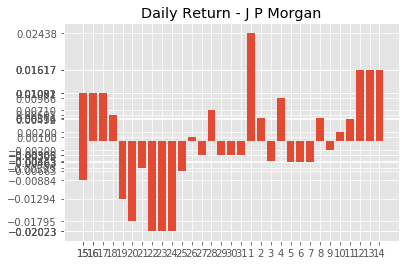

In [92]:
#Plotting Daily Return
daily_return_list=[]
for x in JPM_Data_Stock.daily_return:
    daily_return_list.append(x)
print(len(daily_return_list))
day_list=[]
for x in JPM_Data_Stock.Day:
    day_list.append(x)
print(len(day_list))
#plt.hist(daily_return_list)
y=day_list
plt.bar(y, height=daily_return_list)
plt.title("Daily Return - J P Morgan")
plt.xticks(day_list,day_list)
plt.yticks(daily_return_list)
plt.figure.figsize=(50,20)

plt.show()

The graph above shows the Daily Returns. It can be seen that the daily return on 3/30 comes out to be negative and the scores for 3/28 were :

pos_tweets_score:0.025270

neg_tweets_score:0.027541

pos_news_score:0.011765

neg_news_score:0.023529.

This is some of the few examples. It can be observed that the sentiments for the day before were reflected on Close values the day after. It can be seen that sometimes the daily return values are affected by News and sometimes by Tweets. 

In [93]:
JPM_Data_Stock

Date        High         Low        Open       Close    Volume  \
0   3/15/2019  106.800003  105.230003  105.410004  106.550003  24811700   
1   3/16/2019  106.800003  105.230003  105.410004  106.550003  24811700   
2   3/17/2019  106.800003  105.230003  105.410004  106.550003  24811700   
3   3/18/2019  107.790001  106.500000  106.550003  107.190002  12935500   
4   3/19/2019  108.400001  106.550003  108.199997  106.800003  12889300   
5   3/20/2019  106.650001  104.410004  106.430000  104.519997  14920700   
6   3/21/2019  103.489998  102.279999  103.489998  102.870003  19751000   
7   3/22/2019  102.320000   99.519997  101.820000   99.760002  31115200   
8   3/23/2019  102.320000   99.519997  101.820000   99.760002  31115200   
9   3/24/2019  102.320000   99.519997  101.820000   99.760002  31115200   
10  3/25/2019  100.570000   98.089996   99.589996   98.930000  21032300   
11  3/26/2019  100.400002   98.820000   99.820000   99.919998  15987100   
12  3/27/2019  100.449997   99.080002   99.879997   99.580002  12753200   
13  3/28/2019  100.800003   99.739998  100.000000  100.709999  12454100   
14  3/29/2019  101.989998  100.589996  101.540001  101.230003  14523400   
15  3/30/2019  101.989998  100.589996  101.540001  101.230003  14523400   
16  3/31/2019  101.989998  100.589996  101.540001  101.230003  14523400   
17   4/1/2019  104.680000  102.120003  102.150002  104.639999  17499300   
18   4/2/2019  105.440002  104.330002  104.599998  105.139999  10295400   
19   4/3/2019  106.360001  104.790001  105.809998  105.349999  11499200   
20   4/4/2019  105.730003  104.449997  104.550003  105.559998  11952100   
21   4/5/2019  106.110001  104.989998  105.800003  105.309998   9933700   
22   4/6/2019  106.110001  104.989998  105.800003  105.309998   9933700   
23   4/7/2019  106.110001  104.989998  105.800003  105.309998   9933700   
24   4/8/2019  105.650001  104.910004  105.110001  105.650001   8056300   
25   4/9/2019  105.199997  104.250000  105.080002  104.870003   9092200   
26  4/10/2019  105.720001  104.470001  105.129997  105.339996  10882300   
27  4/11/2019  106.730003  105.559998  105.709999  106.230003  11183800   
28  4/12/2019  111.849999  108.879997  109.440002  111.209999  25834100   
29  4/13/2019  111.849999  108.879997  109.440002  111.209999  25834100   
30  4/14/2019  111.849999  108.879997  109.440002  111.209999  25834100   
31  4/15/2019  111.000000  109.120003  110.919998  109.940002  15163800   
32  4/16/2019  111.389999  109.860001  109.900001  111.099999  11583200   

     Adj Close  Vol_normalized  daily_return Month Day  Year  
0   105.740891        0.726635      0.010815     3  15  2019  
1   105.740891        0.726635      0.010815     3  16  2019  
2   105.740891        0.726635      0.010815     3  17  2019  
3   106.376030        0.211597      0.006007     3  18  2019  
4   105.988991        0.209594     -0.012939     3  19  2019  
5   103.726295        0.297690     -0.017946     3  20  2019  
6   102.088837        0.507166     -0.005991     3  21  2019  
7    99.002449        1.000000     -0.020232     3  22  2019  
8    99.002449        1.000000     -0.020232     3  23  2019  
9    99.002449        1.000000     -0.020232     3  24  2019  
10   98.178749        0.562733     -0.006627     3  25  2019  
11   99.161232        0.343937      0.001002     3  26  2019  
12   98.823814        0.203691     -0.003004     3  27  2019  
13   99.945236        0.190720      0.007100     3  28  2019  
14  100.461288        0.280460     -0.003053     3  29  2019  
15  100.461288        0.280460     -0.003053     3  30  2019  
16  100.461288        0.280460     -0.003053     3  31  2019  
17  103.845390        0.409516      0.024376     4   1  2019  
18  104.341591        0.097104      0.005163     4   2  2019  
19  104.549995        0.149309     -0.004347     4   3  2019  
20  105.559998        0.168950      0.009660     4   4  2019  
21  105.309998        0.081418     -0.004631     4   5  2019  
22  105.3

In [94]:
JPM_Data_Stock = JPM_Data_Stock.drop(['Year'],axis=1)
JPM_Data_Stock

Date        High         Low        Open       Close    Volume  \
0   3/15/2019  106.800003  105.230003  105.410004  106.550003  24811700   
1   3/16/2019  106.800003  105.230003  105.410004  106.550003  24811700   
2   3/17/2019  106.800003  105.230003  105.410004  106.550003  24811700   
3   3/18/2019  107.790001  106.500000  106.550003  107.190002  12935500   
4   3/19/2019  108.400001  106.550003  108.199997  106.800003  12889300   
5   3/20/2019  106.650001  104.410004  106.430000  104.519997  14920700   
6   3/21/2019  103.489998  102.279999  103.489998  102.870003  19751000   
7   3/22/2019  102.320000   99.519997  101.820000   99.760002  31115200   
8   3/23/2019  102.320000   99.519997  101.820000   99.760002  31115200   
9   3/24/2019  102.320000   99.519997  101.820000   99.760002  31115200   
10  3/25/2019  100.570000   98.089996   99.589996   98.930000  21032300   
11  3/26/2019  100.400002   98.820000   99.820000   99.919998  15987100   
12  3/27/2019  100.449997   99.080002   99.879997   99.580002  12753200   
13  3/28/2019  100.800003   99.739998  100.000000  100.709999  12454100   
14  3/29/2019  101.989998  100.589996  101.540001  101.230003  14523400   
15  3/30/2019  101.989998  100.589996  101.540001  101.230003  14523400   
16  3/31/2019  101.989998  100.589996  101.540001  101.230003  14523400   
17   4/1/2019  104.680000  102.120003  102.150002  104.639999  17499300   
18   4/2/2019  105.440002  104.330002  104.599998  105.139999  10295400   
19   4/3/2019  106.360001  104.790001  105.809998  105.349999  11499200   
20   4/4/2019  105.730003  104.449997  104.550003  105.559998  11952100   
21   4/5/2019  106.110001  104.989998  105.800003  105.309998   9933700   
22   4/6/2019  106.110001  104.989998  105.800003  105.309998   9933700   
23   4/7/2019  106.110001  104.989998  105.800003  105.309998   9933700   
24   4/8/2019  105.650001  104.910004  105.110001  105.650001   8056300   
25   4/9/2019  105.199997  104.250000  105.080002  104.870003   9092200   
26  4/10/2019  105.720001  104.470001  105.129997  105.339996  10882300   
27  4/11/2019  106.730003  105.559998  105.709999  106.230003  11183800   
28  4/12/2019  111.849999  108.879997  109.440002  111.209999  25834100   
29  4/13/2019  111.849999  108.879997  109.440002  111.209999  25834100   
30  4/14/2019  111.849999  108.879997  109.440002  111.209999  25834100   
31  4/15/2019  111.000000  109.120003  110.919998  109.940002  15163800   
32  4/16/2019  111.389999  109.860001  109.900001  111.099999  11583200   

     Adj Close  Vol_normalized  daily_return Month Day  
0   105.740891        0.726635      0.010815     3  15  
1   105.740891        0.726635      0.010815     3  16  
2   105.740891        0.726635      0.010815     3  17  
3   106.376030        0.211597      0.006007     3  18  
4   105.988991        0.209594     -0.012939     3  19  
5   103.726295        0.297690     -0.017946     3  20  
6   102.088837        0.507166     -0.005991     3  21  
7    99.002449        1.000000     -0.020232     3  22  
8    99.002449        1.000000     -0.020232     3  23  
9    99.002449        1.000000     -0.020232     3  24  
10   98.178749        0.562733     -0.006627     3  25  
11   99.161232        0.343937      0.001002     3  26  
12   98.823814        0.203691     -0.003004     3  27  
13   99.945236        0.190720      0.007100     3  28  
14  100.461288        0.280460     -0.003053     3  29  
15  100.461288        0.280460     -0.003053     3  30  
16  100.461288        0.280460     -0.003053     3  31  
17  103.845390        0.409516      0.024376     4   1  
18  104.341591        0.097104      0.005163     4   2  
19  104.549995        0.149309     -0.004347     4   3  
20  105.559998        0.168950      0.009660     4   4  
21  105.309998        0.081418     -0.004631     4   5  
22  105.309998        0.081418     -0.004631     4   6  
23  105.309998        0.081418     -0.004631     4   7  
24  105.650001        0.000000   

In [95]:
JPM_Data_Stock['Day'] = JPM_Data_Stock['Day'].astype(int)
JPM_Data_Stock['Month'] = JPM_Data_Stock['Month'].astype(int)

In [96]:
JPM_Data_Stock["1d"] = np.round(JPM_Data_Stock["Close"].rolling(window=1,center=False).mean(),2) 

In [97]:
JPM_Data_Stock

Date        High         Low        Open       Close    Volume  \
0   3/15/2019  106.800003  105.230003  105.410004  106.550003  24811700   
1   3/16/2019  106.800003  105.230003  105.410004  106.550003  24811700   
2   3/17/2019  106.800003  105.230003  105.410004  106.550003  24811700   
3   3/18/2019  107.790001  106.500000  106.550003  107.190002  12935500   
4   3/19/2019  108.400001  106.550003  108.199997  106.800003  12889300   
5   3/20/2019  106.650001  104.410004  106.430000  104.519997  14920700   
6   3/21/2019  103.489998  102.279999  103.489998  102.870003  19751000   
7   3/22/2019  102.320000   99.519997  101.820000   99.760002  31115200   
8   3/23/2019  102.320000   99.519997  101.820000   99.760002  31115200   
9   3/24/2019  102.320000   99.519997  101.820000   99.760002  31115200   
10  3/25/2019  100.570000   98.089996   99.589996   98.930000  21032300   
11  3/26/2019  100.400002   98.820000   99.820000   99.919998  15987100   
12  3/27/2019  100.449997   99.080002   99.879997   99.580002  12753200   
13  3/28/2019  100.800003   99.739998  100.000000  100.709999  12454100   
14  3/29/2019  101.989998  100.589996  101.540001  101.230003  14523400   
15  3/30/2019  101.989998  100.589996  101.540001  101.230003  14523400   
16  3/31/2019  101.989998  100.589996  101.540001  101.230003  14523400   
17   4/1/2019  104.680000  102.120003  102.150002  104.639999  17499300   
18   4/2/2019  105.440002  104.330002  104.599998  105.139999  10295400   
19   4/3/2019  106.360001  104.790001  105.809998  105.349999  11499200   
20   4/4/2019  105.730003  104.449997  104.550003  105.559998  11952100   
21   4/5/2019  106.110001  104.989998  105.800003  105.309998   9933700   
22   4/6/2019  106.110001  104.989998  105.800003  105.309998   9933700   
23   4/7/2019  106.110001  104.989998  105.800003  105.309998   9933700   
24   4/8/2019  105.650001  104.910004  105.110001  105.650001   8056300   
25   4/9/2019  105.199997  104.250000  105.080002  104.870003   9092200   
26  4/10/2019  105.720001  104.470001  105.129997  105.339996  10882300   
27  4/11/2019  106.730003  105.559998  105.709999  106.230003  11183800   
28  4/12/2019  111.849999  108.879997  109.440002  111.209999  25834100   
29  4/13/2019  111.849999  108.879997  109.440002  111.209999  25834100   
30  4/14/2019  111.849999  108.879997  109.440002  111.209999  25834100   
31  4/15/2019  111.000000  109.120003  110.919998  109.940002  15163800   
32  4/16/2019  111.389999  109.860001  109.900001  111.099999  11583200   

     Adj Close  Vol_normalized  daily_return  Month  Day      1d  
0   105.740891        0.726635      0.010815      3   15  106.55  
1   105.740891        0.726635      0.010815      3   16  106.55  
2   105.740891        0.726635      0.010815      3   17  106.55  
3   106.376030        0.211597      0.006007      3   18  107.19  
4   105.988991        0.209594     -0.012939      3   19  106.80  
5   103.726295        0.297690     -0.017946      3   20  104.52  
6   102.088837        0.507166     -0.005991      3   21  102.87  
7    99.002449        1.000000     -0.020232      3   22   99.76  
8    99.002449        1.000000     -0.020232      3   23   99.76  
9    99.002449        1.000000     -0.020232      3   24   99.76  
10   98.178749        0.562733     -0.006627      3   25   98.93  
11   99.161232        0.343937      0.001002      3   26   99.92  
12   98.823814        0.203691     -0.003004      3   27   99.58  
13   99.945236        0.190720      0.007100      3   28  100.71  
14  100.461288        0.280460     -0.003053      3   29  101.23  
15  100.461288        0.280460     -0.003053      3   30  101.23  
16  100.461288        0.280460     -0.003053      3   31  101.23  
17  103.845390        0.409516      0.024376      4    1  104.64  
18  104.341591        0.097104      0.005163      4    2  105.14  
19  104.549995        0.149309     -0.004347      4    3  105.35  
20  105.559998        0.168950      0.009660      4

### FEATURE ENGINEERING

Feature Engineering is focused on generating potentially higher significant attributes from the data we have.

We performed merging data of tweets, news and stocks to create a final dataset.

We created a Date feature to signify each unique date without incorporating datetime datatype from data

We created Normalized Volume feature that described the total stock trades for a particular date(i.e wrt date_feature)

We created daily return per dollar feature that describes the motion of stock prices for a particular date.

In [98]:
#Merging Data to create a Combined Dataframe to apply ML Model.
df3=pd.merge(final_dataset_Tweets,final_dataset_News, how="outer", on=["Month","Day"])

In [99]:
df3

Month  Day                                      Tweet_nonstop  \
0       3   16  {'active': 2, 'stock': 6, 'options': 4, 'frida...   
1       3   17  {'chase': 44, 'jpm': 80, 'branch': 2, 'st': 2,...   
2       3   18  {'profitpacked': 2, 'option': 4, 'trade': 34, ...   
3       3   19  {'profitpacked': 2, 'option': 4, 'trade': 28, ...   
4       3   20  {'profitpacked': 2, 'option': 2, 'trade': 24, ...   
5       3   21  {'profitpacked': 2, 'option': 6, 'trade': 38, ...   
6       3   22  {'profitpacked': 2, 'option': 4, 'trade': 42, ...   
7       3   23  {'profitpacked': 2, 'option': 4, 'trade': 22, ...   
8       3   24  {'profitpacked': 2, 'option': 2, 'trade': 20, ...   
9       3   25  {'profitpacked': 1, 'option': 4, 'trade': 22, ...   
10      3   26  {'kneesvillage': 1, 'farm': 1, 'international'...   
11      3   27  {'profitpacked': 1, 'option': 1, 'trade': 17, ...   
12      3   28  {'profitpacked': 1, 'option': 1, 'trade': 20, ...   
13      3   30  {'unpopular': 1, 'opinion': 1, 'buy': 2, 'bank...   
14      3   31  {'profitpacked': 1, 'option': 1, 'trade': 17, ...   
15      4    1  {'profitpacked': 1, 'option': 2, 'trade': 21, ...   
16      4    2  {'profitpacked': 1, 'option': 2, 'trade': 20, ...   
17      4    3  {'profitpacked': 1, 'option': 1, 'trade': 21, ...   
18      4    4  {'profitpacked': 1, 'option': 2, 'trade': 21, ...   
19      4    5  {'profitpacked': 1, 'option': 1, 'trade': 26, ...   
20      4    6  {'profitpacked': 1, 'option': 1, 'trade': 14, ...   
21      4    7  {'profitpacked': 1, 'option': 1, 'trade': 13, ...   
22      4    8  {'profitpacked': 1, 'option': 2, 'trade': 23, ...   
23      4    9  {'profitpacked': 1, 'option': 2, 'trade': 23, ...   
24      4   10  {'profitpacked': 1, 'option': 1, 'trade': 18, ...   
25      4   11  {'profitpacked': 1, 'option': 4, 'trade': 27, ...   
26      4   12  {'profitpacked': 1, 'option': 10, 'trade': 64,...   
27      4   13  {'profitpacked': 1, 'option': 3, 'trade': 13, ...   
28      4   14  {'profitpacked': 1, 'option': 1, 'trade': 16, ...   
29      4   15  {'profitpacked': 1, 'option': 6, 'trade': 25, ...   
30      4   16  {'profitpacked': 1, 'option': 2, 'trade': 20, ...   
31      3   29                                                NaN   

    pos_parity_tweets  neg_parity_tweets  \
0            0.024194           0.029570   
1            0.026399           0.026399   
2            0.024884           0.023818   
3            0.034634           0.018851   
4            0.026899           0.026899   
5            0.026760           0.032935   
6            0.022383           0.036501   
7            0.027473           0.018315   
8            0.015200           0.026400   
9            0.031883           0.027581   
10           0.023915           0.025028   
11           0.024025           0.031825   
12           0.025270           0.027541   
13           0.045822           0.026954   
14           0.018626           0.022701   
15           0.026369           0.023182   
16           0.021194           0.021791   
17           0.023810           0.019481   
18           0.025137           0.031474   
19           0.023451           0.024567   
20           0.021770           0.031601   
21           0.027607           0.023517   
22           0.027339           0.024658   
23           0.021378           0.024396   
24           0.025133           0.024671   
25           0.032105           0.021332   
26           0.041391           0.022721   
27           0.027604           0.015104   
28           0.024839           0.028979   
29           0.026025           0.021254   
30           0.022789           0.019599   
31                NaN                NaN   

                                          JPM_nonstop  pos_parity_news  \
0   {'first': 2, 'earn': 2, 'decline': 2, 'three':...         0.076923   
1   {'noteworthy': 1, 'friday': 1, 'option': 1, 'a...         0.053333   
2   {'dianrong': 1, 'boss': 1, 'daringly': 1, 'say.

In [100]:
df4= pd.merge(df3,JPM_Data_Stock, how="outer", on=["Month","Day"])

In [101]:
df4

Month  Day                                      Tweet_nonstop  \
0       3   16  {'active': 2, 'stock': 6, 'options': 4, 'frida...   
1       3   17  {'chase': 44, 'jpm': 80, 'branch': 2, 'st': 2,...   
2       3   18  {'profitpacked': 2, 'option': 4, 'trade': 34, ...   
3       3   19  {'profitpacked': 2, 'option': 4, 'trade': 28, ...   
4       3   20  {'profitpacked': 2, 'option': 2, 'trade': 24, ...   
5       3   21  {'profitpacked': 2, 'option': 6, 'trade': 38, ...   
6       3   22  {'profitpacked': 2, 'option': 4, 'trade': 42, ...   
7       3   23  {'profitpacked': 2, 'option': 4, 'trade': 22, ...   
8       3   24  {'profitpacked': 2, 'option': 2, 'trade': 20, ...   
9       3   25  {'profitpacked': 1, 'option': 4, 'trade': 22, ...   
10      3   26  {'kneesvillage': 1, 'farm': 1, 'international'...   
11      3   27  {'profitpacked': 1, 'option': 1, 'trade': 17, ...   
12      3   28  {'profitpacked': 1, 'option': 1, 'trade': 20, ...   
13      3   30  {'unpopular': 1, 'opinion': 1, 'buy': 2, 'bank...   
14      3   31  {'profitpacked': 1, 'option': 1, 'trade': 17, ...   
15      4    1  {'profitpacked': 1, 'option': 2, 'trade': 21, ...   
16      4    2  {'profitpacked': 1, 'option': 2, 'trade': 20, ...   
17      4    3  {'profitpacked': 1, 'option': 1, 'trade': 21, ...   
18      4    4  {'profitpacked': 1, 'option': 2, 'trade': 21, ...   
19      4    5  {'profitpacked': 1, 'option': 1, 'trade': 26, ...   
20      4    6  {'profitpacked': 1, 'option': 1, 'trade': 14, ...   
21      4    7  {'profitpacked': 1, 'option': 1, 'trade': 13, ...   
22      4    8  {'profitpacked': 1, 'option': 2, 'trade': 23, ...   
23      4    9  {'profitpacked': 1, 'option': 2, 'trade': 23, ...   
24      4   10  {'profitpacked': 1, 'option': 1, 'trade': 18, ...   
25      4   11  {'profitpacked': 1, 'option': 4, 'trade': 27, ...   
26      4   12  {'profitpacked': 1, 'option': 10, 'trade': 64,...   
27      4   13  {'profitpacked': 1, 'option': 3, 'trade': 13, ...   
28      4   14  {'profitpacked': 1, 'option': 1, 'trade': 16, ...   
29      4   15  {'profitpacked': 1, 'option': 6, 'trade': 25, ...   
30      4   16  {'profitpacked': 1, 'option': 2, 'trade': 20, ...   
31      3   29                                                NaN   
32      3   15                                                NaN   

    pos_parity_tweets  neg_parity_tweets  \
0            0.024194           0.029570   
1            0.026399           0.026399   
2            0.024884           0.023818   
3            0.034634           0.018851   
4            0.026899           0.026899   
5            0.026760           0.032935   
6            0.022383           0.036501   
7            0.027473           0.018315   
8            0.015200           0.026400   
9            0.031883           0.027581   
10           0.023915           0.025028   
11           0.024025           0.031825   
12           0.025270           0.027541   
13           0.045822           0.026954   
14           0.018626           0.022701   
15           0.026369           0.023182   
16           0.021194           0.021791   
17           0.023810           0.019481   
18           0.025137           0.031474   
19           0.023451           0.024567   
20           0.021770           0.031601   
21           0.027607           0.023517   
22           0.027339           0.024658   
23           0.021378           0.024396   
24           0.025133           0.024671   
25           0.032105           0.021332   
26           0.041391           0.022721   
27           0.027604           0.015104   
28           0.024839           0.028979   
29           0.026025           0.021254   
30           0.022789           0.019599   
31                NaN                NaN   
32                NaN                NaN   

                                          JPM_nonstop  pos_parity_news  \
0   {'first': 2, 'earn': 2, 'decline': 2, 'three':...         0.076923   
1   {'notewo

In [102]:
temp_datafile_comb=df4[1:31]

In [103]:
temp_datafile_comb

Month  Day                                      Tweet_nonstop  \
1       3   17  {'chase': 44, 'jpm': 80, 'branch': 2, 'st': 2,...   
2       3   18  {'profitpacked': 2, 'option': 4, 'trade': 34, ...   
3       3   19  {'profitpacked': 2, 'option': 4, 'trade': 28, ...   
4       3   20  {'profitpacked': 2, 'option': 2, 'trade': 24, ...   
5       3   21  {'profitpacked': 2, 'option': 6, 'trade': 38, ...   
6       3   22  {'profitpacked': 2, 'option': 4, 'trade': 42, ...   
7       3   23  {'profitpacked': 2, 'option': 4, 'trade': 22, ...   
8       3   24  {'profitpacked': 2, 'option': 2, 'trade': 20, ...   
9       3   25  {'profitpacked': 1, 'option': 4, 'trade': 22, ...   
10      3   26  {'kneesvillage': 1, 'farm': 1, 'international'...   
11      3   27  {'profitpacked': 1, 'option': 1, 'trade': 17, ...   
12      3   28  {'profitpacked': 1, 'option': 1, 'trade': 20, ...   
13      3   30  {'unpopular': 1, 'opinion': 1, 'buy': 2, 'bank...   
14      3   31  {'profitpacked': 1, 'option': 1, 'trade': 17, ...   
15      4    1  {'profitpacked': 1, 'option': 2, 'trade': 21, ...   
16      4    2  {'profitpacked': 1, 'option': 2, 'trade': 20, ...   
17      4    3  {'profitpacked': 1, 'option': 1, 'trade': 21, ...   
18      4    4  {'profitpacked': 1, 'option': 2, 'trade': 21, ...   
19      4    5  {'profitpacked': 1, 'option': 1, 'trade': 26, ...   
20      4    6  {'profitpacked': 1, 'option': 1, 'trade': 14, ...   
21      4    7  {'profitpacked': 1, 'option': 1, 'trade': 13, ...   
22      4    8  {'profitpacked': 1, 'option': 2, 'trade': 23, ...   
23      4    9  {'profitpacked': 1, 'option': 2, 'trade': 23, ...   
24      4   10  {'profitpacked': 1, 'option': 1, 'trade': 18, ...   
25      4   11  {'profitpacked': 1, 'option': 4, 'trade': 27, ...   
26      4   12  {'profitpacked': 1, 'option': 10, 'trade': 64,...   
27      4   13  {'profitpacked': 1, 'option': 3, 'trade': 13, ...   
28      4   14  {'profitpacked': 1, 'option': 1, 'trade': 16, ...   
29      4   15  {'profitpacked': 1, 'option': 6, 'trade': 25, ...   
30      4   16  {'profitpacked': 1, 'option': 2, 'trade': 20, ...   

    pos_parity_tweets  neg_parity_tweets  \
1            0.026399           0.026399   
2            0.024884           0.023818   
3            0.034634           0.018851   
4            0.026899           0.026899   
5            0.026760           0.032935   
6            0.022383           0.036501   
7            0.027473           0.018315   
8            0.015200           0.026400   
9            0.031883           0.027581   
10           0.023915           0.025028   
11           0.024025           0.031825   
12           0.025270           0.027541   
13           0.045822           0.026954   
14           0.018626           0.022701   
15           0.026369           0.023182   
16           0.021194           0.021791   
17           0.023810           0.019481   
18           0.025137           0.031474   
19           0.023451           0.024567   
20           0.021770           0.031601   
21           0.027607           0.023517   
22           0.027339           0.024658   
23           0.021378           0.024396   
24           0.025133           0.024671   
25           0.032105           0.021332   
26           0.041391           0.022721   
27           0.027604           0.015104   
28           0.024839           0.028979   
29           0.026025           0.021254   
30           0.022789           0.019599   

                                          JPM_nonstop  pos_parity_news  \
1   {'noteworthy': 1, 'friday': 1, 'option': 1, 'a...         0.053333   
2   {'dianrong': 1, 'boss': 1, 'daringly': 1, 'say...         0.047619   
3   {'scrap': 2, 'foreign': 2, 'ownership': 2, 'ca...         0.016807   
4   {'weak': 2, 'earn': 2, 'growth': 2, 'ahead': 2...         0.057143   
5   {'nasdaq': 1, 'composite': 1, 'index': 1, 'clo...         0.036364   
6   {'us': 4, 'stock': 3, 'movetesla': 1, 'ge': 1,...  

In [104]:
temp_datafile_comb['date_feature']= (temp_datafile_comb['Month']+temp_datafile_comb['Day'])/temp_datafile_comb['Month']
temp_datafile_comb

C:\SAHAJ_1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Month  Day                                      Tweet_nonstop  \
1       3   17  {'chase': 44, 'jpm': 80, 'branch': 2, 'st': 2,...   
2       3   18  {'profitpacked': 2, 'option': 4, 'trade': 34, ...   
3       3   19  {'profitpacked': 2, 'option': 4, 'trade': 28, ...   
4       3   20  {'profitpacked': 2, 'option': 2, 'trade': 24, ...   
5       3   21  {'profitpacked': 2, 'option': 6, 'trade': 38, ...   
6       3   22  {'profitpacked': 2, 'option': 4, 'trade': 42, ...   
7       3   23  {'profitpacked': 2, 'option': 4, 'trade': 22, ...   
8       3   24  {'profitpacked': 2, 'option': 2, 'trade': 20, ...   
9       3   25  {'profitpacked': 1, 'option': 4, 'trade': 22, ...   
10      3   26  {'kneesvillage': 1, 'farm': 1, 'international'...   
11      3   27  {'profitpacked': 1, 'option': 1, 'trade': 17, ...   
12      3   28  {'profitpacked': 1, 'option': 1, 'trade': 20, ...   
13      3   30  {'unpopular': 1, 'opinion': 1, 'buy': 2, 'bank...   
14      3   31  {'profitpacked': 1, 'option': 1, 'trade': 17, ...   
15      4    1  {'profitpacked': 1, 'option': 2, 'trade': 21, ...   
16      4    2  {'profitpacked': 1, 'option': 2, 'trade': 20, ...   
17      4    3  {'profitpacked': 1, 'option': 1, 'trade': 21, ...   
18      4    4  {'profitpacked': 1, 'option': 2, 'trade': 21, ...   
19      4    5  {'profitpacked': 1, 'option': 1, 'trade': 26, ...   
20      4    6  {'profitpacked': 1, 'option': 1, 'trade': 14, ...   
21      4    7  {'profitpacked': 1, 'option': 1, 'trade': 13, ...   
22      4    8  {'profitpacked': 1, 'option': 2, 'trade': 23, ...   
23      4    9  {'profitpacked': 1, 'option': 2, 'trade': 23, ...   
24      4   10  {'profitpacked': 1, 'option': 1, 'trade': 18, ...   
25      4   11  {'profitpacked': 1, 'option': 4, 'trade': 27, ...   
26      4   12  {'profitpacked': 1, 'option': 10, 'trade': 64,...   
27      4   13  {'profitpacked': 1, 'option': 3, 'trade': 13, ...   
28      4   14  {'profitpacked': 1, 'option': 1, 'trade': 16, ...   
29      4   15  {'profitpacked': 1, 'option': 6, 'trade': 25, ...   
30      4   16  {'profitpacked': 1, 'option': 2, 'trade': 20, ...   

    pos_parity_tweets  neg_parity_tweets  \
1            0.026399           0.026399   
2            0.024884           0.023818   
3            0.034634           0.018851   
4            0.026899           0.026899   
5            0.026760           0.032935   
6            0.022383           0.036501   
7            0.027473           0.018315   
8            0.015200           0.026400   
9            0.031883           0.027581   
10           0.023915           0.025028   
11           0.024025           0.031825   
12           0.025270           0.027541   
13           0.045822           0.026954   
14           0.018626           0.022701   
15           0.026369           0.023182   
16           0.021194           0.021791   
17           0.023810           0.019481   
18           0.025137           0.031474   
19           0.023451           0.024567   
20           0.021770           0.031601   
21           0.027607           0.023517   
22           0.027339           0.024658   
23           0.021378           0.024396   
24           0.025133           0.024671   
25           0.032105           0.021332   
26           0.041391           0.022721   
27           0.027604           0.015104   
28           0.024839           0.028979   
29           0.026025           0.021254   
30           0.022789           0.019599   

                                          JPM_nonstop  pos_parity_news  \
1   {'noteworthy': 1, 'friday': 1, 'option': 1, 'a...         0.053333   
2   {'dianrong': 1, 'boss': 1, 'daringly': 1, 'say...         0.047619   
3   {'scrap': 2, 'foreign': 2, 'ownership': 2, 'ca...         0.016807   
4   {'weak': 2, 'earn': 2, 'growth': 2, 'ahead': 2...         0.057143   
5   {'nasdaq': 1, 'composite': 1, 'index': 1, 'clo...         0.036364   
6   {'us': 4, 'stock': 3, 'movetesla': 1, 'ge': 1,...  

In [105]:
temp_datafile_comb=temp_datafile_comb.drop(["Month","Day","Tweet_nonstop","JPM_nonstop","High","Low","Open","Volume","Adj Close"], axis=1)

In [106]:
temp_datafile_comb

pos_parity_tweets  neg_parity_tweets  pos_parity_news  neg_parity_news  \
1            0.026399           0.026399         0.053333         0.000000   
2            0.024884           0.023818         0.047619         0.000000   
3            0.034634           0.018851         0.016807         0.016807   
4            0.026899           0.026899         0.057143         0.028571   
5            0.026760           0.032935         0.036364         0.027273   
6            0.022383           0.036501         0.041667         0.055556   
7            0.027473           0.018315         0.076923         0.076923   
8            0.015200           0.026400         0.015152         0.060606   
9            0.031883           0.027581         0.032787         0.016393   
10           0.023915           0.025028         0.052632         0.000000   
11           0.024025           0.031825         0.005882         0.017647   
12           0.025270           0.027541         0.011765         0.023529   
13           0.045822           0.026954         0.056075         0.000000   
14           0.018626           0.022701         0.056604         0.150943   
15           0.026369           0.023182         0.046296         0.000000   
16           0.021194           0.021791         0.016129         0.048387   
17           0.023810           0.019481         0.033333         0.066667   
18           0.025137           0.031474         0.025000         0.025000   
19           0.023451           0.024567         0.039216         0.019608   
20           0.021770           0.031601         0.000000         0.022222   
21           0.027607           0.023517         0.029412         0.000000   
22           0.027339           0.024658         0.025806         0.000000   
23           0.021378           0.024396         0.035354         0.055556   
24           0.025133           0.024671         0.035714         0.029762   
25           0.032105           0.021332         0.004975         0.029851   
26           0.041391           0.022721         0.081784         0.033457   
27           0.027604           0.015104         0.000000         0.000000   
28           0.024839           0.028979         0.131148         0.065574   
29           0.026025           0.021254         0.062323         0.036827   
30           0.022789           0.019599         0.061475         0.024590   

         Date       Close  Vol_normalized  daily_return      1d  date_feature  
1   3/17/2019  106.550003        0.726635      0.010815  106.55      6.666667  
2   3/18/2019  107.190002        0.211597      0.006007  107.19      7.000000  
3   3/19/2019  106.800003        0.209594     -0.012939  106.80      7.333333  
4   3/20/2019  104.519997        0.297690     -0.017946  104.52      7.666667  
5   3/21/2019  102.870003        0.507166     -0.005991  102.87      8.000000  
6   3/22/2019   99.760002        1.000000     -0.020232   99.76      8.333333  
7   3/23/2019   99.760002        1.000000     -0.020232   99.76      8.666667  
8   3/24/2019   99.760002        1.000000     -0.020232   99.76      9.000000  
9   3/25/2019   98.930000        0.562733     -0.006627   98.93      9.333333  
10  3/26/2019   99.919998        0.343937      0.001002   99.92      9.666667  
11  3/27/2019   99.580002        0.203691     -0.003004   99.58     10.000000  
12  3/28/2019  100.709999        0.190720      0.007100  100.71     10.333333  
13  3/30/2019  101.230003        0.280460     -0.003053  101.23     11.000000  
14  3/31/2019  101.230003        0.280460     -0.003053  101.23     11.333333  
15   4/1/2019  104.639999        0.409516      0.024376  104.64      1.250000  
16   4/2/2019  105.139999        0.097104      0.005163  105.14      1.500000  
17   4/3/2019  105.349999        0.149309     -0.004347  105.35      1.750000  
18   4/4/2019  105.559998        0.168950      0.009660  105.56      2.000000  
19   4/5/2019  105.309998        0.081418     -0.004631  105.31  

### Correlation Matrix

We made correlation matrix for all the variables to find out which variables are strongly related to each other. This was done to remove the variables that won’t be contributing much towards the prediction of closing stock prices.

We then used these selected variables for further analysis in our regression models. Variables with higher significance towards predicting closing stock prices are:

Pos_parity_news

Neg_parity_tweets

Date_feature

Normalized Volume

Daily return index.

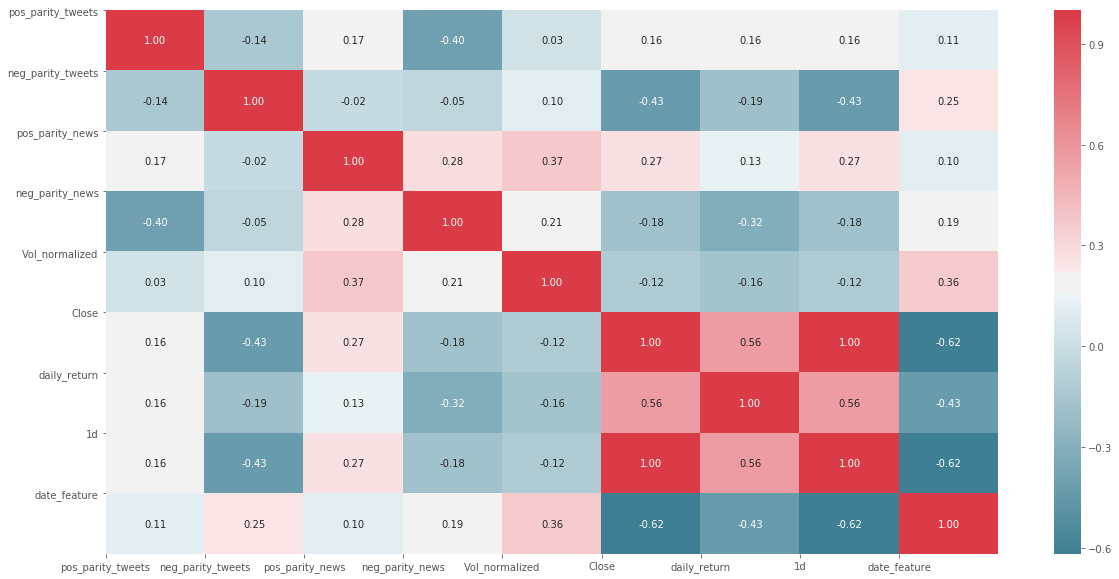

In [107]:
#Heat map to show correlation between attributes of the combined Dataframe.
fig, ax = plt.subplots(figsize=(20, 10))
corr1 = temp_datafile_comb[['pos_parity_tweets','neg_parity_tweets','pos_parity_news','neg_parity_news','Vol_normalized', 'Close','daily_return','1d','date_feature']].corr()
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr1,cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corr1.columns)), corr1.columns,rotation=0)
plt.yticks(range(len(corr1.columns)), corr1.columns,rotation=0)
plt.show()

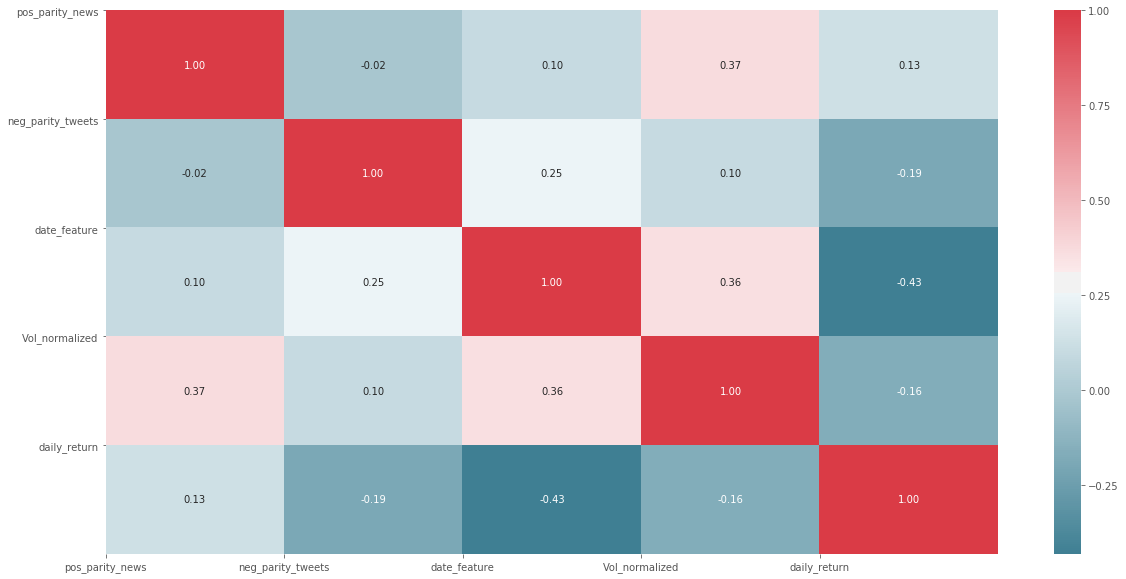

In [108]:
#Heat map to show correlation between significant attributes of the combined Dataframe.
fig, ax = plt.subplots(figsize=(20, 10))
corr = temp_datafile_comb[['pos_parity_news','neg_parity_tweets','date_feature','Vol_normalized','daily_return']].corr()
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns,rotation=0)
plt.yticks(range(len(corr.columns)), corr.columns,rotation=0)
plt.show()

### APPLIED ML

### Applying Simple Linear Regression Model

In [109]:
comb_model1 = sm.ols(formula="Close ~  pos_parity_news +  neg_parity_tweets + date_feature+ Vol_normalized+ daily_return", data=temp_datafile_comb).fit()

In [110]:
comb_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     8.096
Date:                Mon, 22 Apr 2019   Prob (F-statistic):           0.000136
Time:                        00:52:29   Log-Likelihood:                -67.138
No. Observations:                  30   AIC:                             146.3
Df Residuals:                      24   BIC:                             154.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           111.6130      2.662     41.932      0.000     106.119     117.107
pos_parity_news      35.9450     18.695      1.923      0.066      -2.639      74.529
neg_parity_tweets  -206.3466    102.192     -2.019      0.055    -417.261       4.568
date_feature         -0.5488      0.175     -3.130      0.005      -0.911      -0.187
Vol_normalized        0.1962      1.746      0.112      0.911      -3.407       3.799
daily_return         91.9969     46.457      1.980      0.059      -3.885     187.879
==============================================================================
Omnibus:                        0.726   Durbin-Watson:                   0.823
Prob(Omnibus):                  0.695   Jarque-Bera (JB):                0.595
Skew:                          -0.324   Prob(JB):                        0.743
Kurtosis:                       2.762   Cond. No.                     1.48e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [111]:
comb_model1.params

Intercept            111.612956
pos_parity_news       35.944978
neg_parity_tweets   -206.346627
date_feature          -0.548826
Vol_normalized         0.196152
daily_return          91.996921
dtype: float64

In [112]:
model_plot1 = sm.ols(formula="Close ~  pos_parity_news +  neg_parity_tweets + date_feature+ Vol_normalized+ daily_return", data=temp_datafile_comb).fit()
par1 = dict(model_plot1.params)
print(par1) 

{'Intercept': 111.61295571778004, 'pos_parity_news': 35.9449782832134, 'neg_parity_tweets': -206.3466268220502, 'date_feature': -0.5488261933221468, 'Vol_normalized': 0.19615228249252326, 'daily_return': 91.99692062305189}


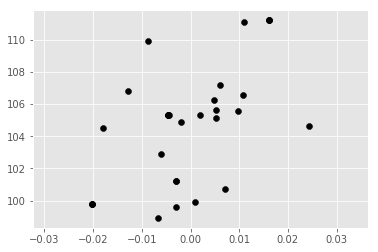

In [113]:
plt.scatter(temp_datafile_comb['daily_return'],temp_datafile_comb['Close'],color='black',label="data")
#plt.scatter(model_plot1['Close'],model_plot1['neg_parity_tweets'],color='black',label="data")
#plt.scatter(model_plot1['Close'],model_plot1['date_feature'],color='black',label="data")
#plt.scatter(model_plot1['Close'],model_plot1['Vol_normalized'],color='black',label="data")
#plt.scatter(model_plot1['Close'],model_plot1['daily_return'],color='black',label="data")

In [114]:
x = temp_datafile_comb['Close']
y1 = par1["Intercept"] + par1['pos_parity_news']*x + par1['neg_parity_tweets']*x+ par1['date_feature']*x+ par1['Vol_normalized']*x+ par1['daily_return']*x
#y2 = par1["Intercept"] + par1['neg_parity_tweets']*x
#y3 = par1["Intercept"] + par1['date_feature']*x
#y4 = par1["Intercept"] + par1['Vol_normalized']*x
#y5 = par1["Intercept"] + par1['daily_return']*x

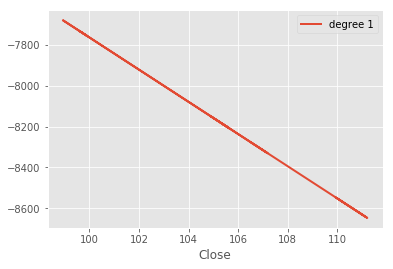

In [115]:
plt.plot(x,y1,label="degree 1",linewidth=2)
#plt.plot(x,y2,label="degree 2",linewidth=2)
#plt.plot(x,y3,label="degree 3",linewidth=2)
#plt.plot(x,y4,label="degree 4",linewidth=2)
#plt.plot(x,y5,label="degree 5",linewidth=2)
#plt.plot(x,y6,label="degree 6",linewidth=2)
plt.legend()
plt.xlabel('Close')
#plt.ylim((0,50))
plt.show()

### Applying Linear Regressor

In [116]:
X_x=temp_datafile_comb[['neg_parity_tweets','pos_parity_news','Vol_normalized', 'daily_return','date_feature']]
Y_y=temp_datafile_comb['Close']

In [117]:
# Train-Test Split for Cross Validation
X_train, X_test, y_train, y_test = train_test_split(X_x, Y_y, test_size=0.3, random_state=0)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
#print(metrics.accuracy_score(y_true=y_test, y_pred= y_pred))
#scores = cross_val_score(estimator=regressor, X=X_test, y=y_test, cv=10, scoring='accuracy')
#print(scores)

In [118]:
y_pred = regressor.predict(X_test)
print('Linear Regression R squared": %.4f' % regressor.score(X_test, y_test))

Linear Regression R squared": -0.0416


In [119]:
print('Coefficients: \n', regressor.coef_)
regressor.get_params()

Coefficients: 
 [81.40210805 77.44632758 -2.08432191 83.34020261 -0.58694271]


{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

The performance for the Linear Regressor is not satisfactory for all the brands as the variation in the stock prices is not consisitent among all of them and these results may be attributed to the less data for the stock prices.

In [120]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(verbose=0)
forest_reg.fit(X_train, y_train)

C:\SAHAJ_1\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [121]:
print('Random Forest R squared": %.4f' % forest_reg.score(X_test, y_test))

Random Forest R squared": 0.8099


Random Forest is more complicated model as compared to others as the final dataset was really small for random forest regressor, it attempted to learn the entire dataset. Thus, depicting overfitting in random forest regression model.